<a href="https://colab.research.google.com/github/e-lprunier/Notebook_4A/blob/main/R%C3%A9duction_de_dimensionnalit%C3%A9_Clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3 Dimensionality reduction

3.1 Iris data - guided

1

In [ ]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
install.packages("ggplot2")
install.packages("rgl")
install.packages("plotly")
library(ggplot2)
library(plotly)
library(rgl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



In [ ]:
install.packages("scatterplot3d")
library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



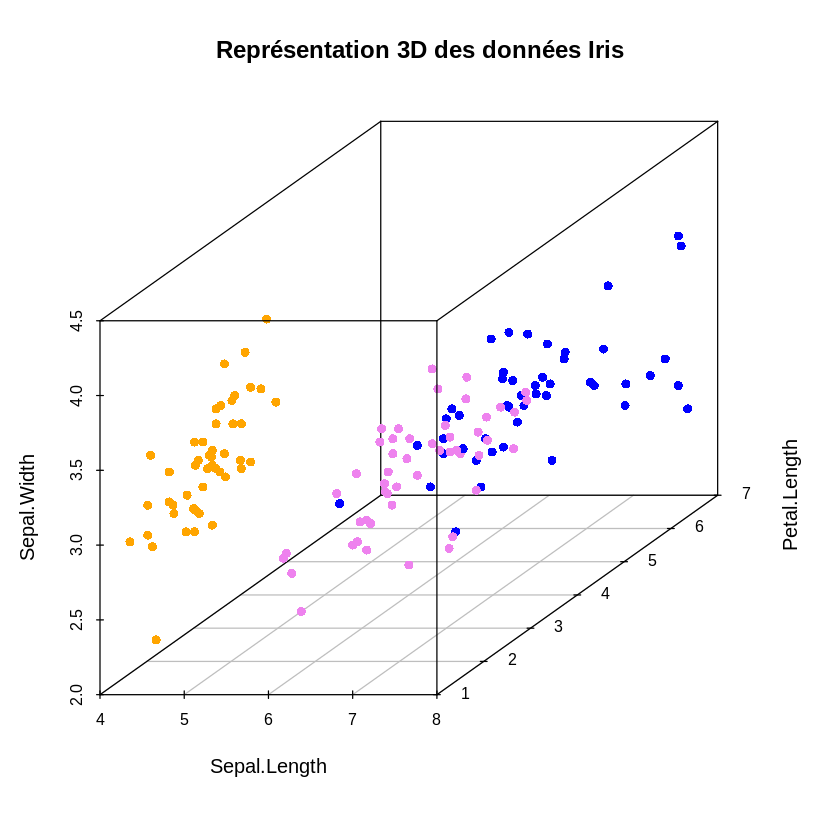

In [ ]:
# Représentation 3D des données
colors <- c("setosa" = "orange", "versicolor" = "violet", "virginica" = "blue")
iris_colors <- colors[iris$Species]

# Représentation 3D des données avec des couleurs plus visibles
scatterplot3d(iris$Sepal.Length, iris$Petal.Length, iris$Sepal.Width,
              main="Représentation 3D des données Iris",
              xlab="Sepal.Length",
              ylab="Petal.Length",
              zlab="Sepal.Width",
              color=iris_colors, # Appliquer les couleurs définies
              pch = 16) # Utilisation de points pleins pour plus de visibilité


2

Réalisation de la PCA sans standardiser les données

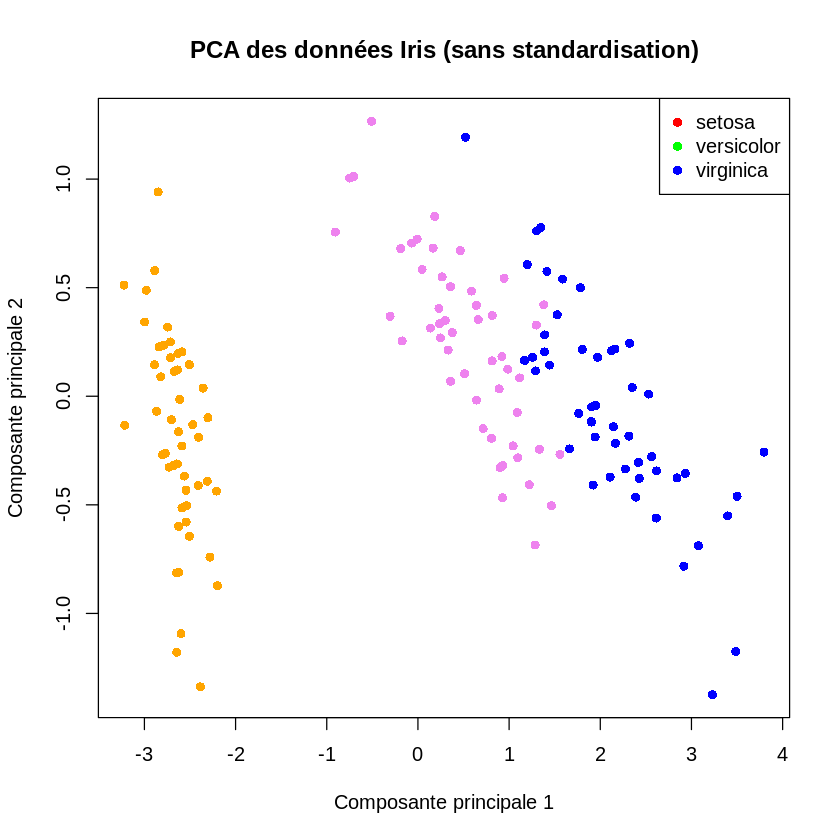

In [ ]:
# Réalisation de la PCA sans standardisation
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = FALSE)

# Récupérer les coordonnées des individus sur les deux premières composantes
pca_iris_data <- as.data.frame(pca_iris$x)

# Représenter les individus sur les deux premières composantes principales
plot(pca_iris_data$PC1, pca_iris_data$PC2, col = iris_colors, pch = 16,
     xlab = "Composante principale 1", ylab = "Composante principale 2",
     main = "PCA des données Iris (sans standardisation)")
legend("topright", legend = levels(iris$Species), col = c("red", "green", "blue"), pch = 16)



Réalisation de la PCA avec standardisation des données

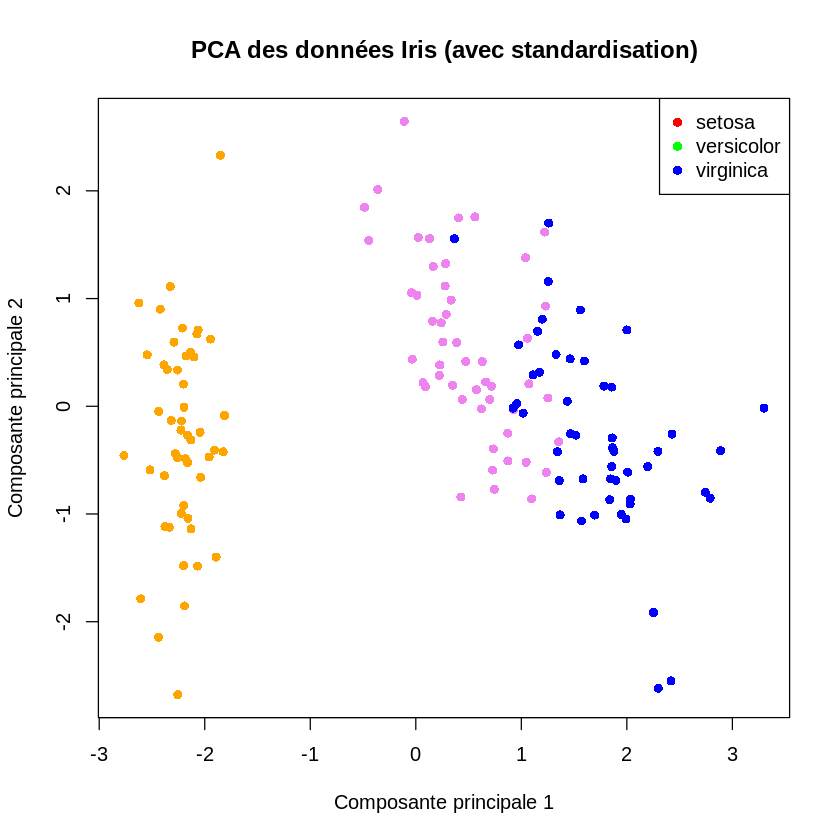

In [ ]:
# Réalisation de la PCA avec standardisation
pca_iris_standardized <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)

# Récupérer les coordonnées des individus sur les deux premières composantes
pca_iris_standardized_data <- as.data.frame(pca_iris_standardized$x)

# Représenter les individus sur les deux premières composantes principales
plot(pca_iris_standardized_data$PC1, pca_iris_standardized_data$PC2, col = iris_colors, pch = 16,
     xlab = "Composante principale 1", ylab = "Composante principale 2",
     main = "PCA des données Iris (avec standardisation)")
legend("topright", legend = levels(iris$Species), col = c("red", "green", "blue"), pch = 16)


La standardisation est essentielle lorsque les variables ont des échelles différentes (par exemple, une variable mesurée en millimètres et une autre en centimètres). Si les données ne sont pas standardisées, les variables avec des valeurs numériques plus grandes pourraient dominer l'analyse, faussant ainsi les résultats de la PCA. En standardisant, chaque variable est ramenée à une échelle comparable, ce qui permet une analyse plus équitable.

3

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Calcul des corrélations
cor_matrix <- cor(iris[, 1:4])
print(cor_matrix)

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000


corrplot 0.94 loaded



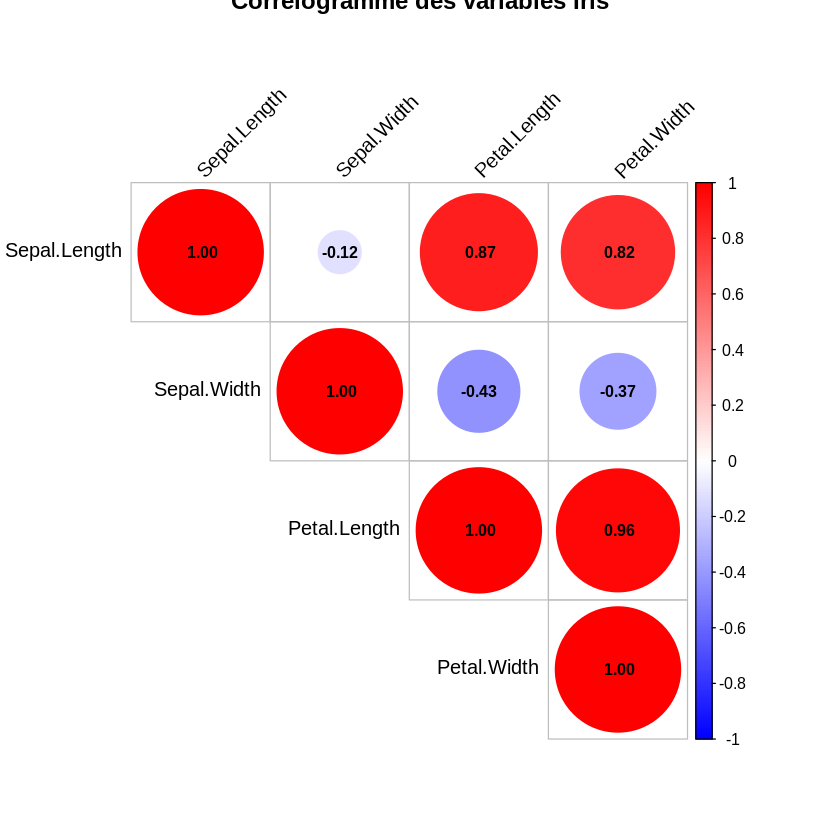

In [ ]:
library(corrplot)

# Représentation du correlogramme
corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.8, col = colorRampPalette(c("blue", "white", "red"))(200),
         title = "Correlogramme des variables Iris")


Interprétation : ici la matrice de corrélation présente les coefficients de corrélation entre chaque paire de variables (entre 1 et -1). Un coefficient proche de 1 signifie une forte corrélation positive (par exemple ici avec Petal.Lenght et Petal.Width). Un coefficient proche de -1 signifie une forte corrélation négative tpar exemple entre sepal.width et petal.length). Un coefficient proche de 0 signifie peu ou pas de corrélation.

4

In [ ]:
# Réalisation de la PCA avec standardisation
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)

In [18]:
# Installer et charger le package factoextra pour la visualisation
install.packages("factoextra")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



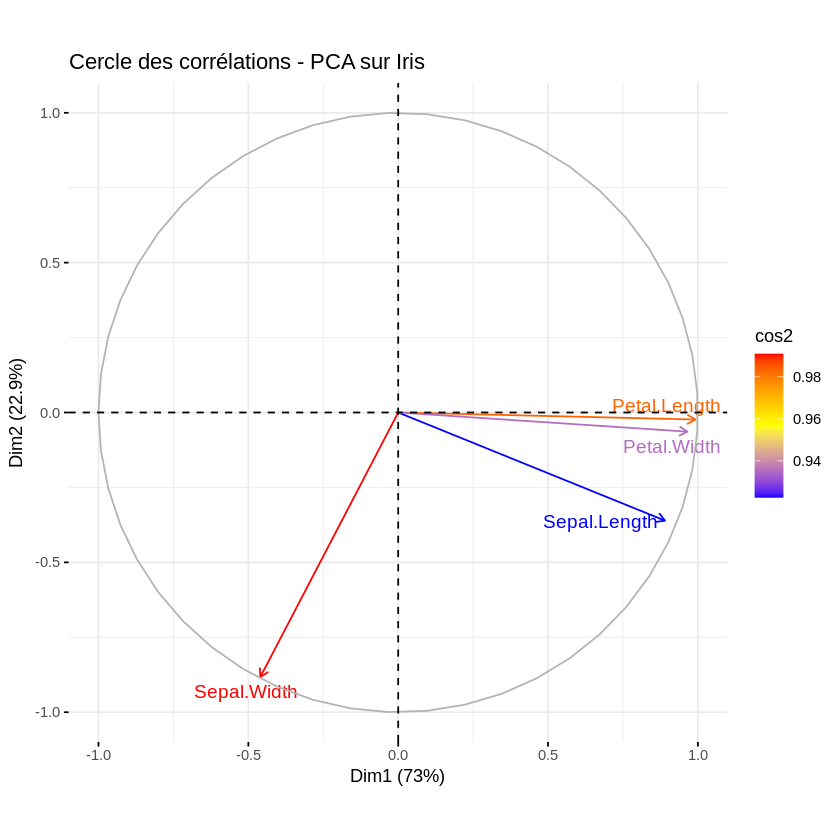

In [19]:
# Représenter le cercle de corrélations
fviz_pca_var(pca_iris,
             col.var = "cos2", # Colorer en fonction de la qualité de la représentation
             gradient.cols = c("blue", "yellow", "red"), # Palette de couleurs
             repel = TRUE, # Éviter les chevauchements de labels
             title = "Cercle des corrélations - PCA sur Iris")

interprétation des résultats : Les variables sont représentées sous forme de flèches. Plus une flèche est longue, plus la variable est bien représentée sur les axes principaux (ici PC1 et PC2).Deux variables fortement corrélées seront représentées par des flèches proches l'une de l'autre ou dans des directions similaires. Inversement, des flèches à 90° ou plus indiqueront une faible corrélation entre les variables.

Variables les plus corrélées : Les variables Petal.Length et Petal.Width seront probablement fortement corrélées, car leurs flèches seront orientées dans des directions similaires. En revanche, des variables comme Sepal.Width pourraient être moins corrélées avec les autres variables, selon l'orientation et la longueur de sa flèche.

5

In [20]:
# Réalisation de la PCA avec standardisation
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)


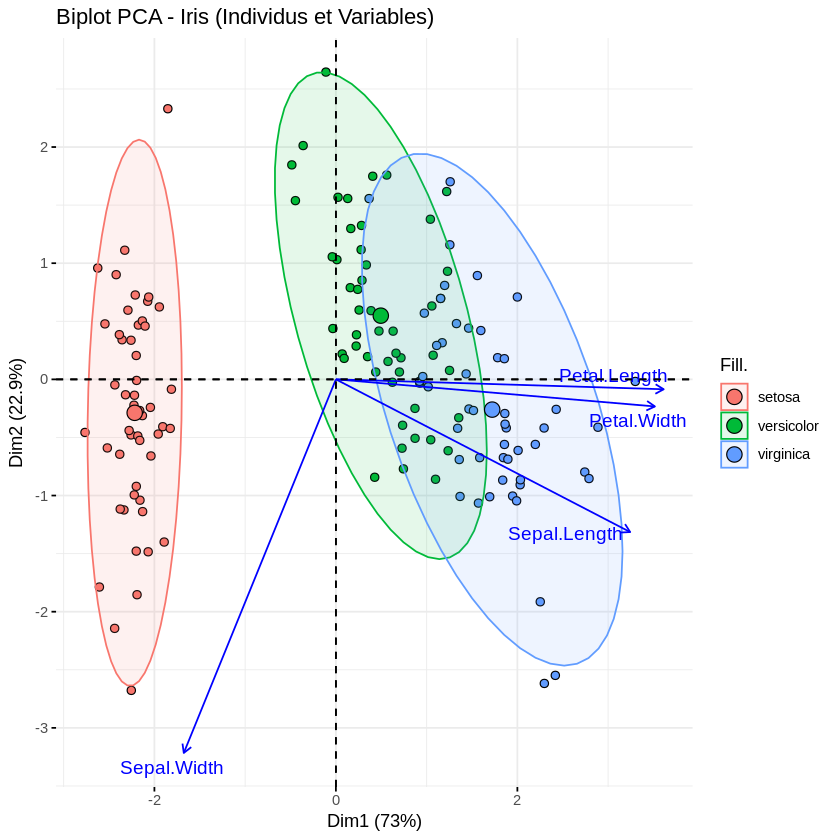

In [27]:
# Créer un biplot combinant individus et variables
fviz_pca_biplot(pca_iris,
                geom.ind = "point", # Représenter les individus comme des points
                pointshape = 21,
                pointsize = 2,
                fill.ind = iris$Species, # Colorer les individus selon les espèces
                col.ind = "black", # Bordure des points noirs
                col.var = "blue", # Flèches des variables en bleu
                repel = TRUE, # Éviter les chevauchements de labels
                addEllipses = TRUE, # Ajouter des ellipses pour chaque espèce
                ellipse.level = 0.95, # Intervalle de confiance des ellipses
                label = "var", # Étiquettes uniquement pour les variables
                title = "Biplot PCA - Iris (Individus et Variables)")


In [23]:
# Voir la variance expliquée par chaque composante
summary(pca_iris)


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

6

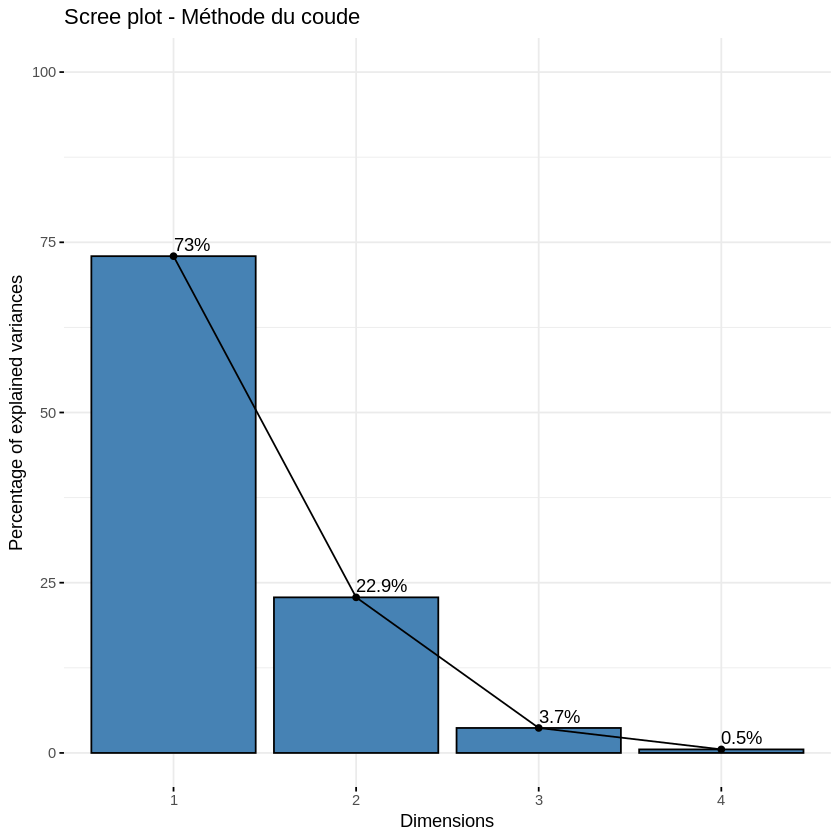

In [28]:
# Charger le package factoextra pour la visualisation
library(factoextra)

# Créer un scree plot avec la méthode du coude
fviz_eig(pca_iris,
         addlabels = TRUE, # Ajouter les étiquettes sur les barres
         ylim = c(0, 100), # Limite de l'axe des y pour une meilleure visibilité
         main = "Scree plot - Méthode du coude",
         barfill = "steelblue", # Couleur des barres
         barcolor = "black") # Couleur des bordures


Interprétation de la méthode du coude: Le scree plot montre les valeurs propres (eigenvalues) pour chaque composante principale. Les valeurs propres correspondent à la quantité de variance expliquée par chaque composante.
La méthode du coude consiste à trouver le point d'inflexion sur le graphique, là où la courbe commence à se "plier". Ce point indique généralement le nombre optimal de composantes principales à conserver, car les composantes suivantes apportent peu d'information supplémentaire.

7

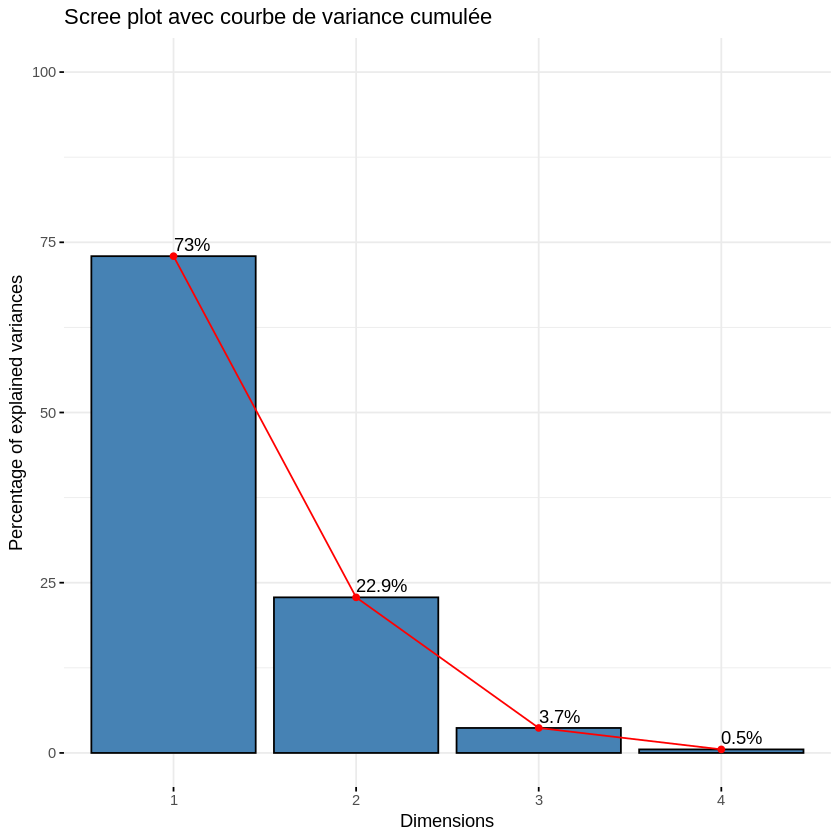

In [29]:
# Charger la bibliothèque factoextra
library(factoextra)

# Créer un scree plot avec les valeurs propres et la courbe de variance expliquée
fviz_eig(pca_iris,
         addlabels = TRUE,   # Ajouter des étiquettes aux barres
         ylim = c(0, 100),   # Limiter l'axe y à 100% de variance
         main = "Scree plot avec courbe de variance cumulée",
         barfill = "steelblue",   # Couleur des barres
         barcolor = "black",      # Couleur des bordures des barres
         linecolor = "red")       # Couleur de la ligne de variance cumulée


8

In [30]:
# Extraire les valeurs propres
eigenvalues <- pca_iris$sdev^2

# Calculer le pourcentage de variance expliquée
explained_variance <- eigenvalues / sum(eigenvalues) * 100

# Créer un tableau avec les valeurs propres et le pourcentage de variance expliquée
variance_table <- data.frame(
  Composantes = paste0("PC", 1:length(eigenvalues)),
  Eigenvalues = eigenvalues,
  `Variance expliquée (%)` = explained_variance,
  `Variance cumulée (%)` = cumsum(explained_variance)
)

# Afficher le tableau
print(variance_table)


  Composantes Eigenvalues Variance.expliquée.... Variance.cumulée....
1         PC1  2.91849782             72.9624454             72.96245
2         PC2  0.91403047             22.8507618             95.81321
3         PC3  0.14675688              3.6689219             99.48213
4         PC4  0.02071484              0.5178709            100.00000


Explication du tableau :
Eigenvalues : Ce sont les valeurs propres pour chaque composante principale, qui indiquent la quantité de variance expliquée par chaque axe.
Variance expliquée (%) : C'est le pourcentage de la variance totale expliquée par chaque composante principale. Cela vous permet de savoir combien d'information est capturée par chaque axe.
Variance cumulée (%) : C'est le pourcentage de variance expliquée par les composantes cumulées. Cela permet de savoir quelle proportion totale de la variance est expliquée par les premières composantes combinées.

9

In [31]:
# Calcul des charges factorielles
loadings <- pca_iris$rotation %*% diag(pca_iris$sdev)

# Créer un tableau avec les charges factorielles pour chaque composante
loadings_table <- as.data.frame(loadings)
colnames(loadings_table) <- paste0("PC", 1:ncol(loadings_table))
loadings_table <- cbind(Variables = rownames(loadings_table), loadings_table)

# Afficher le tableau des charges factorielles
print(loadings_table)


                Variables        PC1         PC2         PC3         PC4
Sepal.Length Sepal.Length  0.8901688 -0.36082989  0.27565767  0.03760602
Sepal.Width   Sepal.Width -0.4601427 -0.88271627 -0.09361987 -0.01777631
Petal.Length Petal.Length  0.9915552 -0.02341519 -0.05444699 -0.11534978
Petal.Width   Petal.Width  0.9649790 -0.06399985 -0.24298265  0.07535950


In [32]:
# Identifier la variable avec la plus forte saturation sur PC1
max_loading_pc1 <- loadings_table[which.max(abs(loadings_table$PC1)), ]
print(max_loading_pc1)


                Variables       PC1         PC2         PC3        PC4
Petal.Length Petal.Length 0.9915552 -0.02341519 -0.05444699 -0.1153498



La variable avec la plus forte saturation sur la composante principale 1 (PC1) est Petal.Length, avec une charge factorielle de 0.9915552. Cela signifie que Petal.Length est la variable la plus fortement corrélée avec la première composante principale.

10

In [33]:
# Calcul des charges factorielles (si ce n'est pas encore fait)
loadings <- pca_iris$rotation %*% diag(pca_iris$sdev)

# Créer un tableau avec les charges factorielles pour chaque composante
loadings_table <- as.data.frame(loadings)
colnames(loadings_table) <- paste0("PC", 1:ncol(loadings_table))
loadings_table <- cbind(Variables = rownames(loadings_table), loadings_table)

# Afficher le tableau des charges factorielles
print(loadings_table)


                Variables        PC1         PC2         PC3         PC4
Sepal.Length Sepal.Length  0.8901688 -0.36082989  0.27565767  0.03760602
Sepal.Width   Sepal.Width -0.4601427 -0.88271627 -0.09361987 -0.01777631
Petal.Length Petal.Length  0.9915552 -0.02341519 -0.05444699 -0.11534978
Petal.Width   Petal.Width  0.9649790 -0.06399985 -0.24298265  0.07535950


In [34]:
# Créer un tableau avec la variable ayant la plus forte saturation pour chaque PC
strongest_loading <- apply(loadings_table[, -1], 2, function(x) loadings_table$Variables[which.max(abs(x))])

# Créer un tableau des résultats
strongest_loading_table <- data.frame(
  Composantes = colnames(loadings_table)[-1],
  `Variable la plus saturée` = strongest_loading
)

# Afficher le tableau
print(strongest_loading_table)


    Composantes Variable.la.plus.saturée
PC1         PC1             Petal.Length
PC2         PC2              Sepal.Width
PC3         PC3             Sepal.Length
PC4         PC4             Petal.Length


PC1 et Petal.Length :

Saturation élevée : Petal.Length a la plus forte saturation sur PC1.
Orientation : Dans le cercle de corrélations, la flèche de Petal.Length sera longue et orientée vers l'axe de PC1, car cette variable explique une grande part de la variance capturée par cette composante.
PC2 et Sepal.Width :

Saturation élevée : Sepal.Width a la plus forte saturation sur PC2.
Orientation : La flèche de Sepal.Width sera alignée principalement avec l'axe de PC2, indiquant que cette variable est fortement associée à la seconde composante principale.
PC3 et Sepal.Length :

Saturation élevée : Sepal.Length a la plus forte saturation sur PC3.
Orientation : La flèche de Sepal.Length sera dirigée vers l'axe de la troisième composante, mais dans un cercle de corrélations en 2D (PC1 et PC2), cette variable pourrait apparaître plus centrée, car PC3 n'est pas représentée.
PC4 et Petal.Length :

Saturation élevée : Petal.Length est également la variable la plus saturée pour PC4.
Orientation : Comme pour PC3, la composante PC4 n'apparaît pas directement dans un cercle en 2D, mais dans une visualisation 3D (PC1, PC2, et PC3), Petal.Length serait orientée selon PC4.

12

Explication de la qualité de la représentation (cos²) :
Cos² : C'est une mesure qui indique à quel point une variable est bien représentée par les axes de la PCA. Elle est calculée comme le carré du cosinus de l'angle entre le vecteur représentant la variable et l'axe. Si une variable est bien alignée avec un axe (fortement représentée par cet axe), son cos² sera proche de 1.
Un cos² élevé signifie que la variable est bien représentée sur cet axe.
Un cos² faible signifie que la variable n'est pas bien représentée sur cet axe et qu'il faudrait peut-être prendre en compte d'autres composantes

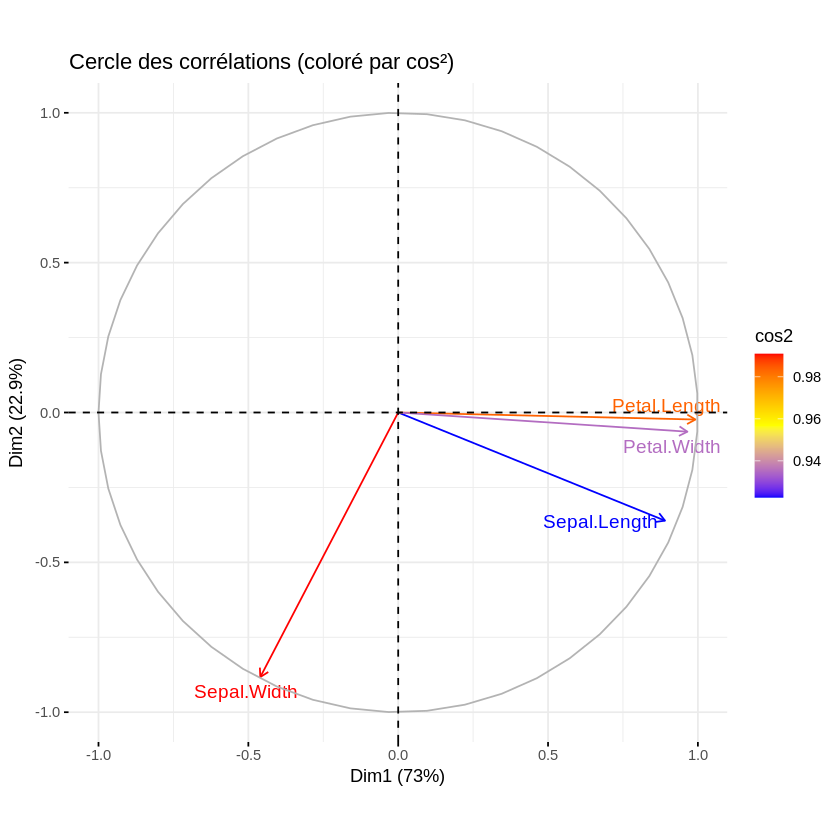

In [35]:
# Charger la bibliothèque factoextra
library(factoextra)

# Représenter le cercle des corrélations avec coloration selon cos²
fviz_pca_var(pca_iris,
             col.var = "cos2", # Colorer selon la qualité de représentation (cos²)
             gradient.cols = c("blue", "yellow", "red"), # Gradient de couleur pour cos²
             repel = TRUE, # Éviter le chevauchement des labels
             title = "Cercle des corrélations (coloré par cos²)")


Une flèche rouge indique une bonne représentation (cos² élevé, proche de 1).
Une flèche bleue indique une représentation moins bonne (cos² faible, proche de 0).

Différence entre cos² et contribution :
Cos² : Il mesure à quel point une variable est bien représentée par les axes. C'est une mesure individuelle pour chaque variable.
Contribution : C'est une mesure de l'importance d'une variable pour une composante donnée. Une variable peut être bien représentée (cos² élevé) mais ne pas contribuer de manière significative à l'axe (contribution faible) si d'autres variables dominent cet axe.

13

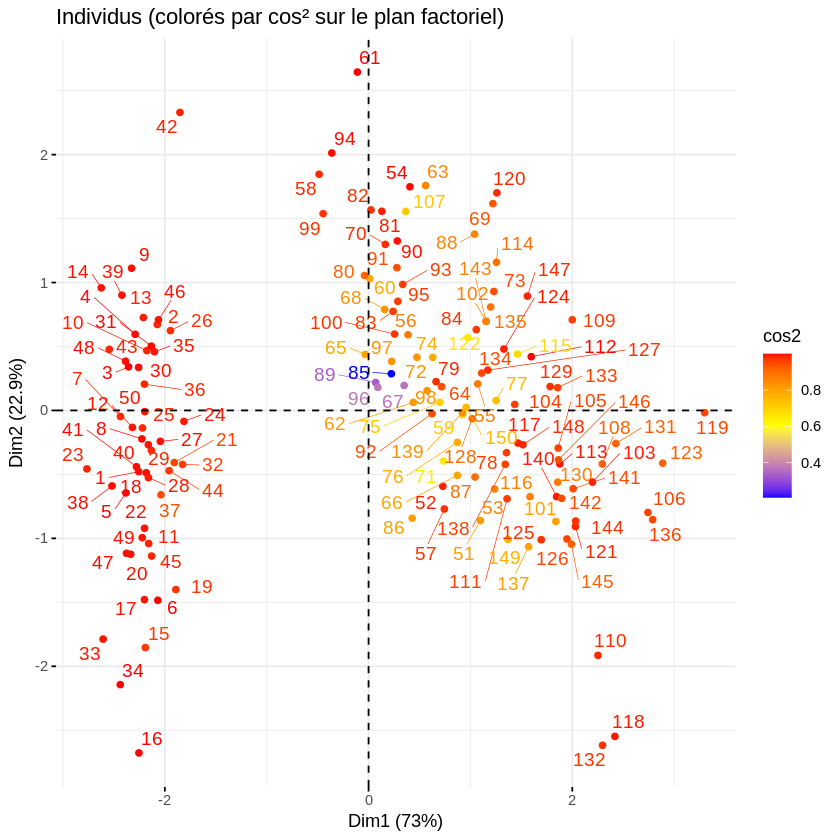

In [36]:
# Représentation des individus avec coloration selon la qualité de représentation (cos²)
fviz_pca_ind(pca_iris,
             col.ind = "cos2", # Colorer les individus selon le cos²
             gradient.cols = c("blue", "yellow", "red"), # Gradient de couleur pour cos²
             repel = TRUE, # Éviter le chevauchement des labels
             title = "Individus (colorés par cos² sur le plan factoriel)")


sans les chiffres

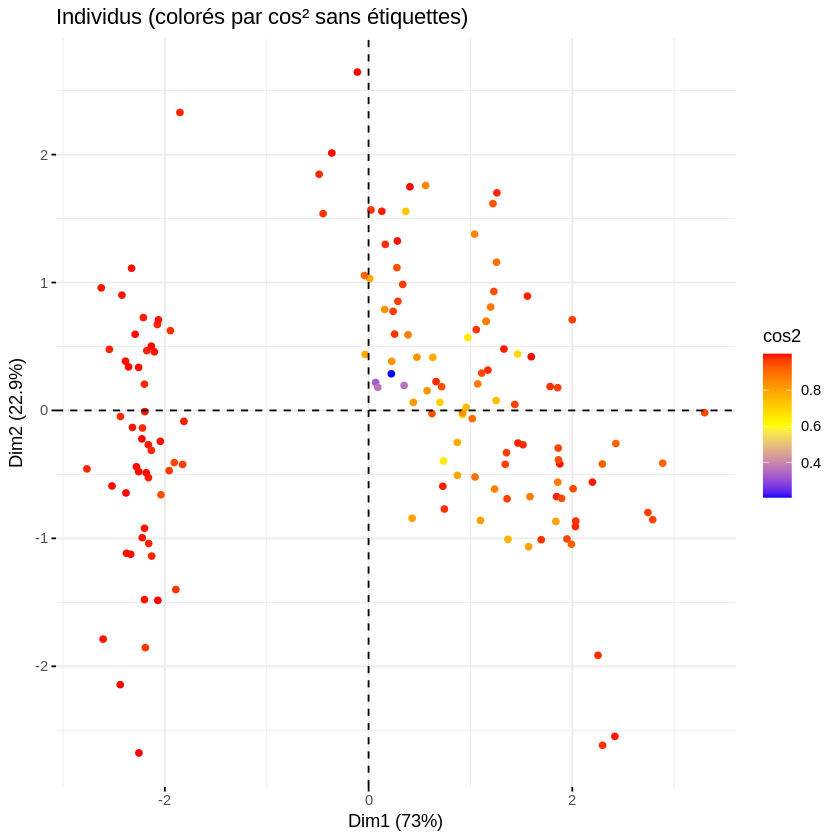

In [37]:
# Représentation des individus avec coloration selon la qualité de représentation (cos²), sans les chiffres
fviz_pca_ind(pca_iris,
             col.ind = "cos2", # Coloration des individus selon leur cos²
             gradient.cols = c("blue", "yellow", "red"), # Gradient de couleur pour cos²
             label = "none", # Pas d'étiquettes (chiffres) sur les individus
             repel = TRUE, # Éviter le chevauchement des labels (même si ici il n'y en a pas)
             title = "Individus (colorés par cos² sans étiquettes)")


14

In [39]:
# Charger le package factoextra
library(factoextra)

# Obtenir les résultats de la PCA pour les individus
ind_pca <- get_pca_ind(pca_iris)

# Extraire la contribution des individus pour les deux premiers axes
contrib_ind <- ind_pca$contrib[, 1:2]

# Créer un tableau avec les contributions pour les axes PC1 et PC2
contrib_table <- as.data.frame(contrib_ind)
colnames(contrib_table) <- c("Contribution PC1 (%)", "Contribution PC2 (%)")

# Afficher le tableau
head(contrib_table)


,Contribution PC1 (%),Contribution PC2 (%)
,<dbl>,<dbl>
1,1.1637691,0.16694510
2,0.9825900,0.32925696
3,1.2683043,0.08469576
4,1.1996857,0.25856249
5,1.2959338,0.30313118
6,0.9775628,1.60670454


15

rapel du K-means : il s agit d une méthode de custering sous forme de hard clustering, c est a dire que chaque point appartient a un cluster unique. Il y a 4 étapes : initialisation qui est aléatroire et qui consiste a fixer le nombre de cluster. Ensuite, viens l étape de l expectation qui consiste a etiqueter les données en fonction du controïde le plus proche. La troisième étape est celle de la maximisation qui consiste a trouver un nouveau centroïde (barycentre) En fin, la condition d arret qui consiste a itérer jusqu a atteindre la stabilité ou si le nombre maximum d itération est déja atteint.

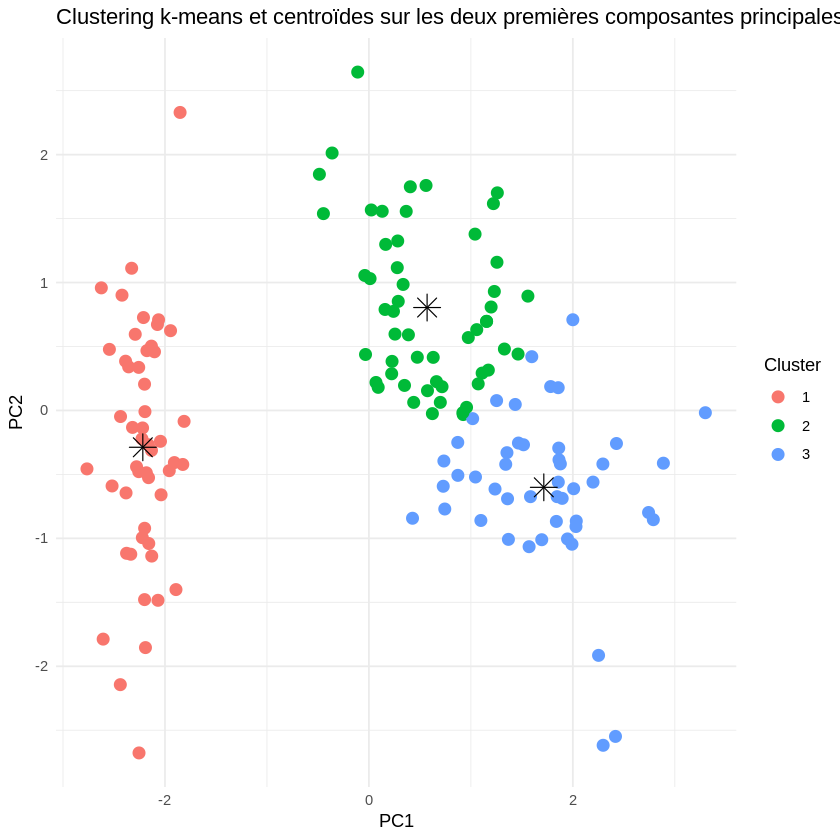

In [40]:
  # Réalisation de la PCA sur les données Iris (déjà standardisées)
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)

# Extraire les deux premières composantes principales
pca_data <- as.data.frame(pca_iris$x[, 1:2])

# Appliquer l'algorithme k-means avec 3 clusters
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(pca_data, centers = 3, nstart = 25)

# Ajouter les résultats des clusters au dataframe PCA
pca_data$Cluster <- as.factor(kmeans_result$cluster)

# Visualiser les clusters et les centroïdes
library(ggplot2)
ggplot(pca_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 3) +
  geom_point(data = as.data.frame(kmeans_result$centers), aes(x = PC1, y = PC2),
             color = "black", size = 5, shape = 8) +
  ggtitle("Clustering k-means et centroïdes sur les deux premières composantes principales") +
  theme_minimal()


16

In [41]:
# Réalisation de la PCA avec standardisation des données
pca_iris <- prcomp(iris[, 1:4], center = TRUE, scale. = TRUE)

# Extraire les deux premières composantes principales pour le clustering
pca_data <- as.data.frame(pca_iris$x[, 1:2]) # On ne garde que les deux premières composantes


In [42]:
# Appliquer l'algorithme k-means avec k = 3
set.seed(123)  # Fixer la graine pour obtenir des résultats reproductibles
kmeans_result <- kmeans(pca_data, centers = 3, nstart = 25)

# Ajouter les résultats des clusters au dataframe PCA
pca_data$Cluster <- as.factor(kmeans_result$cluster)


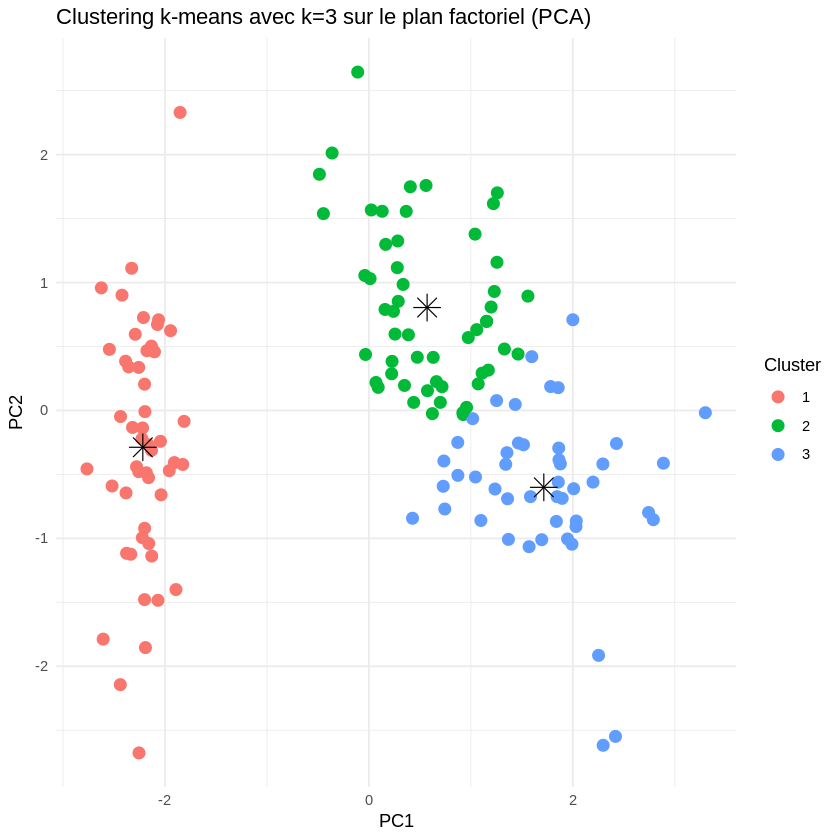

In [43]:
# Visualisation des clusters avec les centroïdes sur le plan factoriel
library(ggplot2)

ggplot(pca_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 3) +
  geom_point(data = as.data.frame(kmeans_result$centers), aes(x = PC1, y = PC2),
             color = "black", size = 5, shape = 8) +
  ggtitle("Clustering k-means avec k=3 sur le plan factoriel (PCA)") +
  theme_minimal()


In [51]:
# Appliquer l'algorithme k-means avec k=3
set.seed(123)  # Fixer la graine pour la reproductibilité
kmeans_result <- kmeans(iris[, 1:4], centers = 3, nstart = 25)

# Ajouter les résultats des clusters au dataframe original iris
iris$Cluster <- as.factor(kmeans_result$cluster)

# Calculer les moyennes des variables pour chaque cluster
cluster_means <- aggregate(. ~ Cluster, data = iris, mean)
print(cluster_means)



  Cluster Sepal.Length Sepal.Width Petal.Length Petal.Width  Species
1       1     5.006000    3.428000     1.462000    0.246000 1.000000
2       2     5.901613    2.748387     4.393548    1.433871 2.225806
3       3     6.850000    3.073684     5.742105    2.071053 2.947368


In [52]:
# Calculer les proportions des espèces dans chaque cluster
species_proportion <- table(iris$Species, iris$Cluster)
print(species_proportion)


            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36


17

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


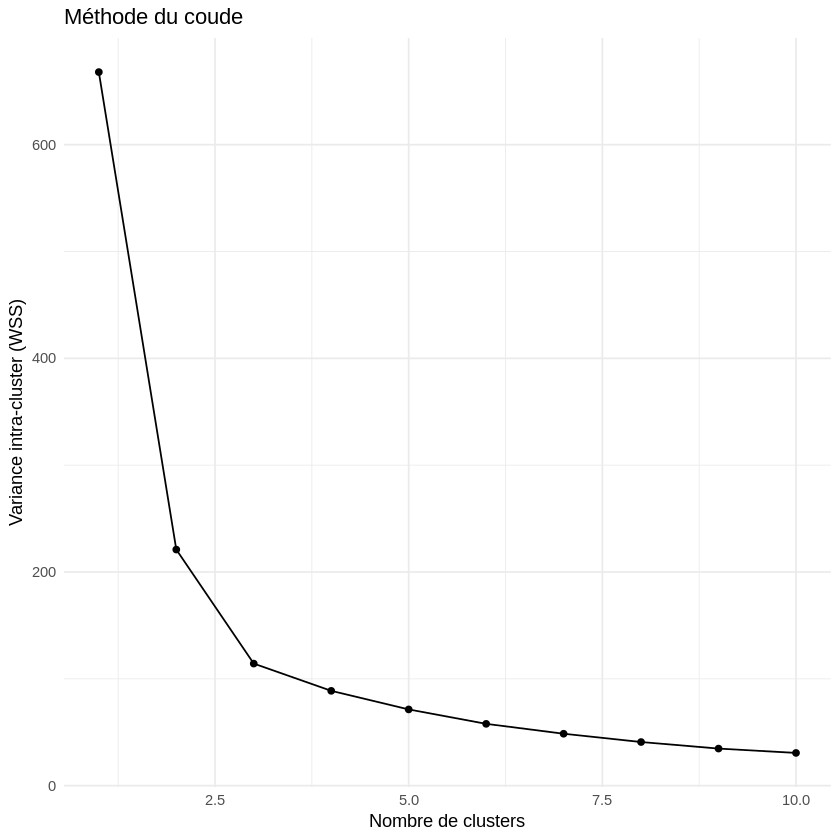

In [53]:
# Charger le package nécessaire pour la visualisation
library(ggplot2)

# Appliquer l'algorithme k-means pour différents nombres de clusters
wss <- sapply(1:10, function(k) {
  kmeans(pca_data, centers = k, nstart = 25)$tot.withinss
})

# Créer un scree plot pour visualiser la méthode du coude
qplot(1:10, wss, geom = "line") +
  geom_point() +
  ggtitle("Méthode du coude") +
  xlab("Nombre de clusters") +
  ylab("Variance intra-cluster (WSS)") +
  theme_minimal()


In [55]:
# Installer et charger le package cluster pour calculer le score de silhouette
install.packages("cluster")
library(cluster)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



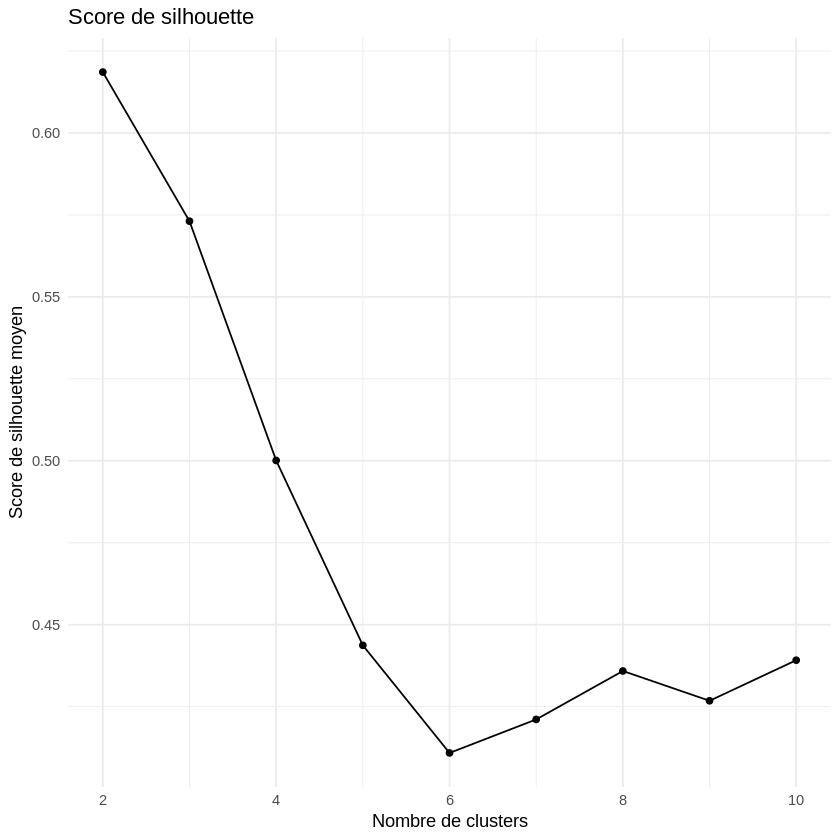

In [56]:
# Appliquer k-means pour k=2 à k=10 et calculer le score de silhouette pour chaque k
sil_scores <- sapply(2:10, function(k) {
  km_res <- kmeans(pca_data, centers = k, nstart = 25)
  ss <- silhouette(km_res$cluster, dist(pca_data))
  mean(ss[, 3])  # Moyenne du score de silhouette pour ce nombre de clusters
})

# Tracer le score de silhouette pour différents k
qplot(2:10, sil_scores, geom = "line") +
  geom_point() +
  ggtitle("Score de silhouette") +
  xlab("Nombre de clusters") +
  ylab("Score de silhouette moyen") +
  theme_minimal()

In [59]:
# Installer et charger le package NbClust
install.packages("NbClust")
library(NbClust)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
# Check the data types of each column in pca_data
str(pca_data)

# If you have non-numeric columns, convert them to numeric if appropriate
# For example, if you have a factor column named 'column_name':
pca_data$column_name <- as.

'data.frame':	150 obs. of  3 variables:
 $ PC1    : num  -2.26 -2.07 -2.36 -2.29 -2.38 ...
 $ PC2    : num  -0.478 0.672 0.341 0.595 -0.645 ...
 $ Cluster: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


ERROR: Error: object 'as.' not found


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


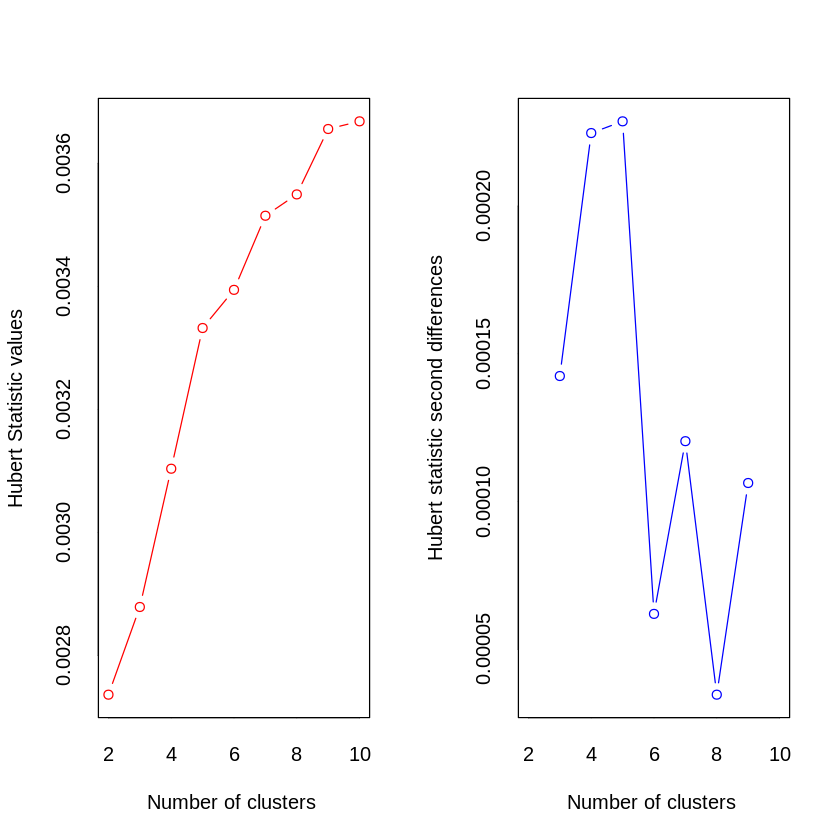

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 9 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 3 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


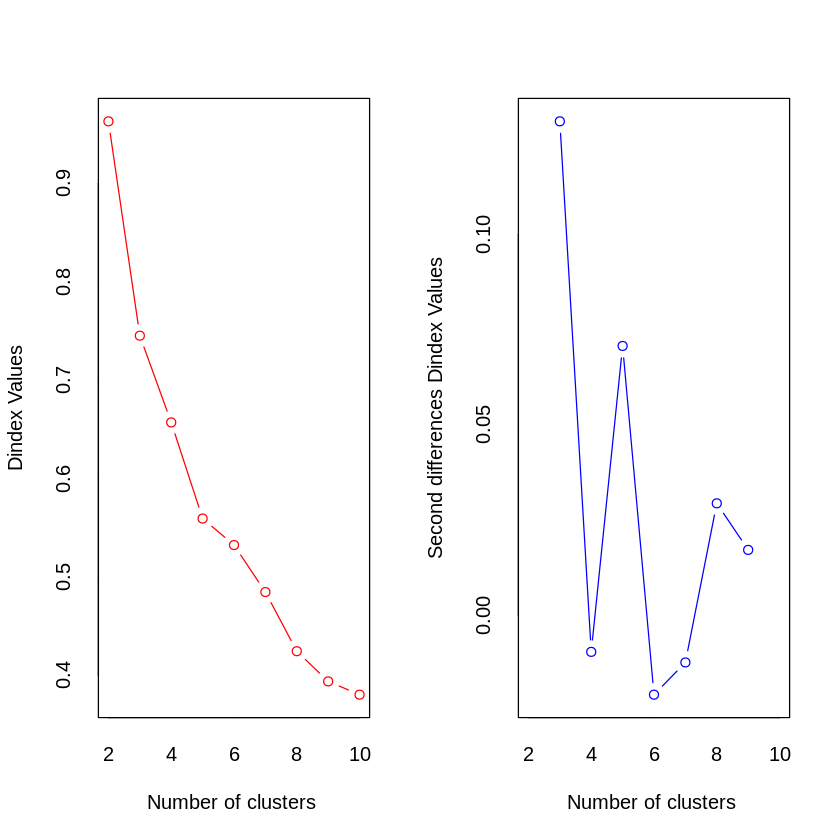

In [63]:
# Select only numeric columns from pca_data
pca_data_numeric <- pca_data[, sapply(pca_data, is.numeric)]

# Use pca_data_numeric in the NbClust function
nbclust_res <- NbClust(pca_data_numeric, min.nc = 2, max.nc = 10, method = "kmeans")

### 4 Decathlon data - guided

In [65]:
install.packages("FactoMineR")
library(FactoMineR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
# Charger les données Decathlon
data(decathlon2)
decathlon_data <- decathlon2[, 1:10]  # Sélection des variables de performance uniquement
head(decathlon_data)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1


1

In [68]:
# Réalisation de la PCA avec les données du décathlon
pca_decathlon <- PCA(decathlon_data, scale.unit = TRUE, graph = FALSE)
pca_decathlon


**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 27 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



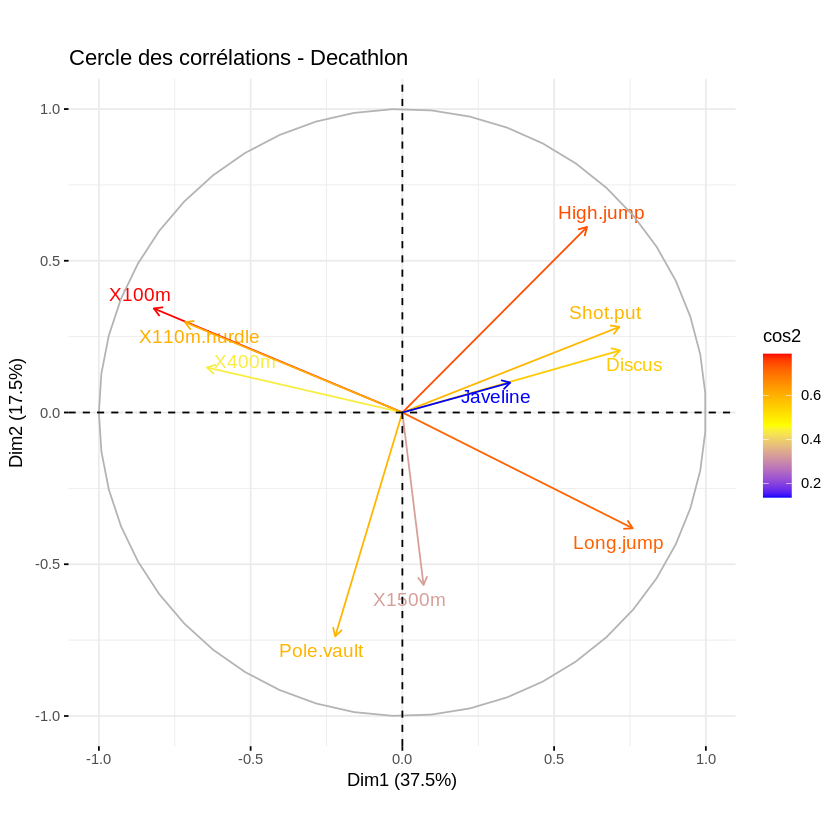

In [71]:
# Charger le package factoextra pour la visualisation
install.packages("factoextra")
library(factoextra)

# Représenter le cercle des corrélations
fviz_pca_var(pca_decathlon,
             col.var = "cos2", # Colorer selon la qualité de représentation (cos²)
             gradient.cols = c("blue", "yellow", "red"), # Palette de couleurs
             repel = TRUE, # Éviter les chevauchements de labels
             title = "Cercle des corrélations - Decathlon")

2

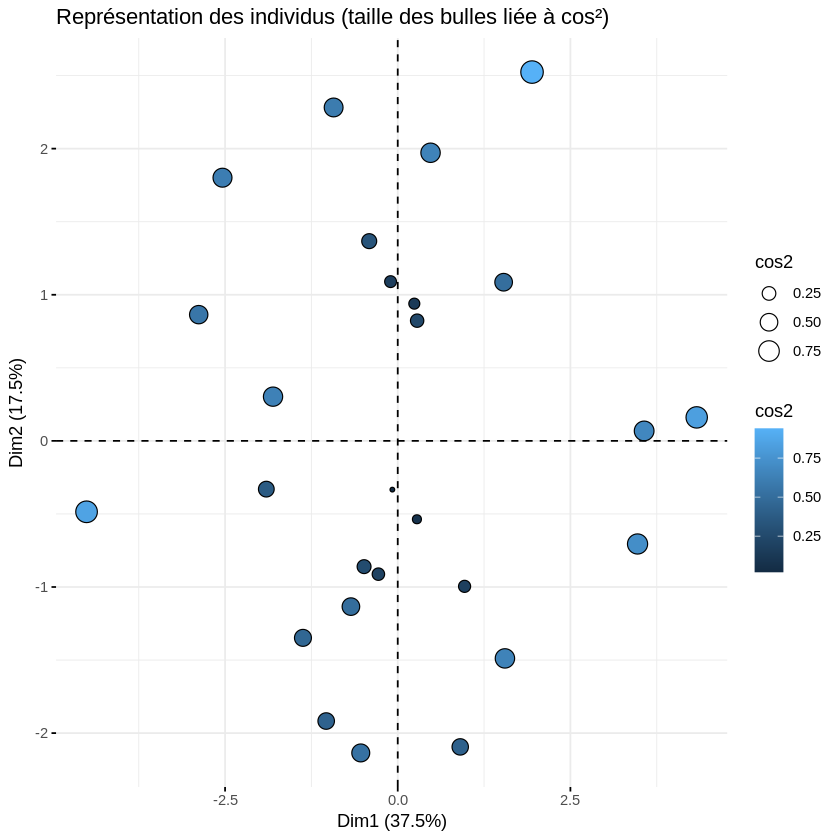

In [72]:
# Représentation des individus avec des bulles dont la taille dépend de la qualité de leur représentation (cos²)
fviz_pca_ind(pca_decathlon,
             geom.ind = "point", # Représenter les individus sous forme de points
             pointsize = "cos2", # La taille des points dépend du cos²
             pointshape = 21, # Forme des points
             fill.ind = "cos2", # Colorer les points selon le cos²
             gradient.cols = c("blue", "yellow", "red"), # Palette de couleurs pour cos²
             repel = TRUE, # Éviter les chevauchements des labels
             title = "Représentation des individus (taille des bulles liée à cos²)")


Interprétation des résultats :
Taille des bulles : La taille des bulles est proportionnelle à la qualité de la représentation de chaque individu sur les deux premières composantes principales, mesurée par cos². Plus un point est grand, mieux l'individu est représenté sur ces deux axes.
Couleur des points : Les individus sont colorés en fonction du cos² (rouge signifie une bonne représentation, bleu une moins bonne). Cela vous aide à repérer visuellement quels athlètes sont bien représentés sur ces axes et quels athlètes le sont moins.
Plan factoriel : Les deux premières composantes principales permettent de visualiser les athlètes dans un espace réduit, tout en conservant la majorité de la variance des données.

3

In [73]:
# Récupérer les résultats pour les variables (contributions)
var_contrib <- pca_decathlon$var$contrib[, 1:5] # Contributions aux 5 premières composantes

# Créer un tableau des contributions
contrib_table <- as.data.frame(var_contrib)
colnames(contrib_table) <- paste0("PC", 1:5)
contrib_table <- cbind(Variables = rownames(contrib_table), contrib_table)

# Afficher le tableau
print(contrib_table)


                Variables        PC1        PC2          PC3        PC4
X100m               X100m 17.8849964  6.7327182  0.670277238  0.9949816
Long.jump       Long.jump 15.3581652  8.3394260  0.002582856  3.3309545
Shot.put         Shot.put 13.6357518  4.5605826 14.793387670  0.1262838
High.jump       High.jump  9.8737797 21.4165036  0.001397716  0.4917303
X400m               X400m 11.0544924  1.2622988 17.525552828  7.0513559
X110m.hurdle X110m.hurdle 13.6869799  5.0732713 11.426291715  2.4733503
Discus             Discus 13.7048617  2.3939535  4.814385760 15.3171947
Pole.vault     Pole.vault  1.3073595 31.1704550 10.704533859  6.1303166
Javeline         Javeline  3.3640178  0.5562982 31.863162259 22.8412641
X1500m             X1500m  0.1295955 18.4944926  8.198428099 41.2425682
                   PC5
X100m         7.819960
Long.jump    11.256195
Shot.put     12.566155
High.jump    14.623936
X400m         6.424985
X110m.hurdle  4.196517
Discus       18.654551
Pole.vault   11.160666
J

PC1 : Si les épreuves comme les courses (100m, 400m, 1500m) contribuent fortement, vous pouvez nommer cette composante "Vitesse".
PC2 : Si les épreuves comme Saut en longueur ou Saut en hauteur ont une contribution importante, vous pouvez la nommer "Sauts".
PC3 : Si les épreuves comme Lancer du poids ou Lancer du disque contribuent fortement, vous pouvez nommer cette composante "Lancers".
PC4 : Si une combinaison d'épreuves plus techniques (par exemple, Perche, Hauteur) est présente, vous pourriez nommer cette composante "Techniques".
PC5 : Si une autre catégorie émerge, par exemple la fatigue ou l'endurance, vous pouvez donner un nom pertinent en fonction de l'analyse des contributions.

In [75]:
composante_noms <- data.frame(
  Composantes = c("PC1", "PC2", "PC3", "PC4", "PC5"),
  Noms = c("Vitesse", "Sauts", "Lancers", "Techniques", "Endurance")
)

# Afficher les noms choisis
print(composante_noms)


  Composantes       Noms
1         PC1    Vitesse
2         PC2      Sauts
3         PC3    Lancers
4         PC4 Techniques
5         PC5  Endurance


PC1 (Vitesse) : Si les épreuves de course (100m, 400m, 1500m) ont les plus fortes contributions, il est logique de nommer cette composante "Vitesse".
PC2 (Sauts) : Si les épreuves de saut contribuent significativement à la deuxième composante, cette composante peut être appelée "Sauts".
PC3 (Lancers) : Si les épreuves de lancer (poids, disque, javelot) sont dominantes sur PC3, cette composante peut être appelée "Lancers".
PC4 (Techniques) : Les épreuves plus techniques, comme la perche ou la hauteur, pourraient justifier le nom "Techniques".
PC5 (Endurance) : Si cette composante est fortement influencée par des épreuves longues comme le 1500m, on pourrait la nommer "Endurance".

4

In [76]:
# Réaliser la PCA sur les données du décathlon
pca_decathlon <- PCA(decathlon_data, scale.unit = TRUE, graph = FALSE)

# Extraire les deux premières composantes principales
pca_data <- as.data.frame(pca_decathlon$ind$coord[, 1:2])  # Coordonnées des individus sur PC1 et PC2


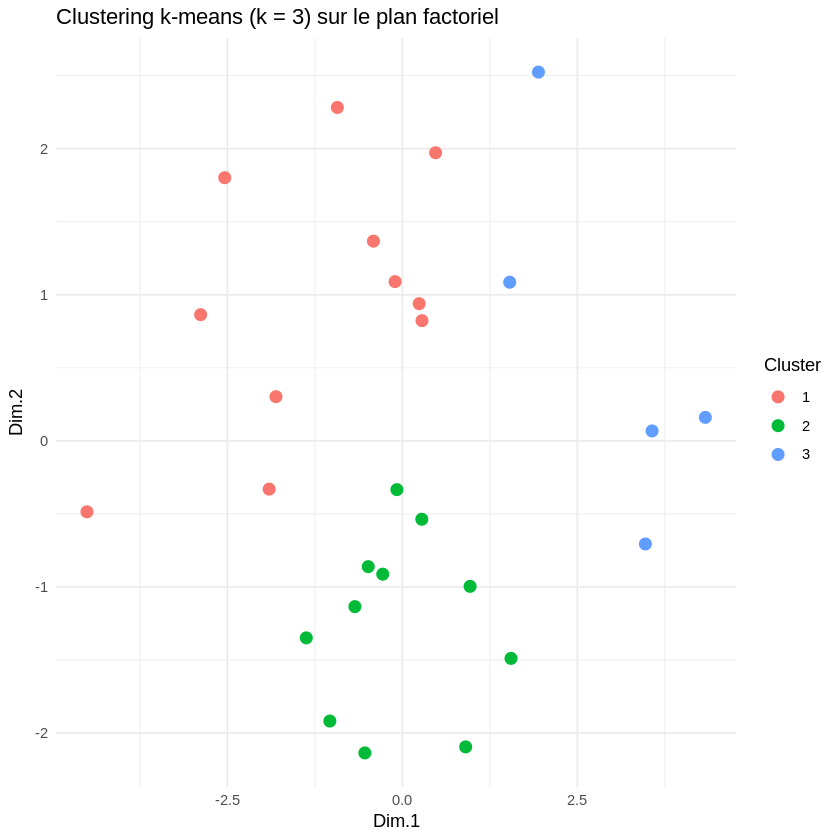

In [77]:
# Appliquer l'algorithme k-means avec k = 3
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(pca_data, centers = 3, nstart = 25)

# Ajouter les résultats des clusters au dataframe PCA
pca_data$Cluster <- as.factor(kmeans_result$cluster)

# Visualiser les clusters avec k-means sur le plan factoriel
library(ggplot2)

ggplot(pca_data, aes(x = Dim.1, y = Dim.2, color = Cluster)) +
  geom_point(size = 3) +
  ggtitle("Clustering k-means (k = 3) sur le plan factoriel") +
  theme_minimal()


In [78]:
# Calculer la matrice de distances
dist_matrix <- dist(decathlon_data)

# Appliquer le clustering hiérarchique avec la méthode de Ward
hc <- hclust(dist_matrix, method = "ward.D2")

# Découper l'arbre pour obtenir 3 clusters
pca_data$HC_Cluster <- cutree(hc, k = 3)


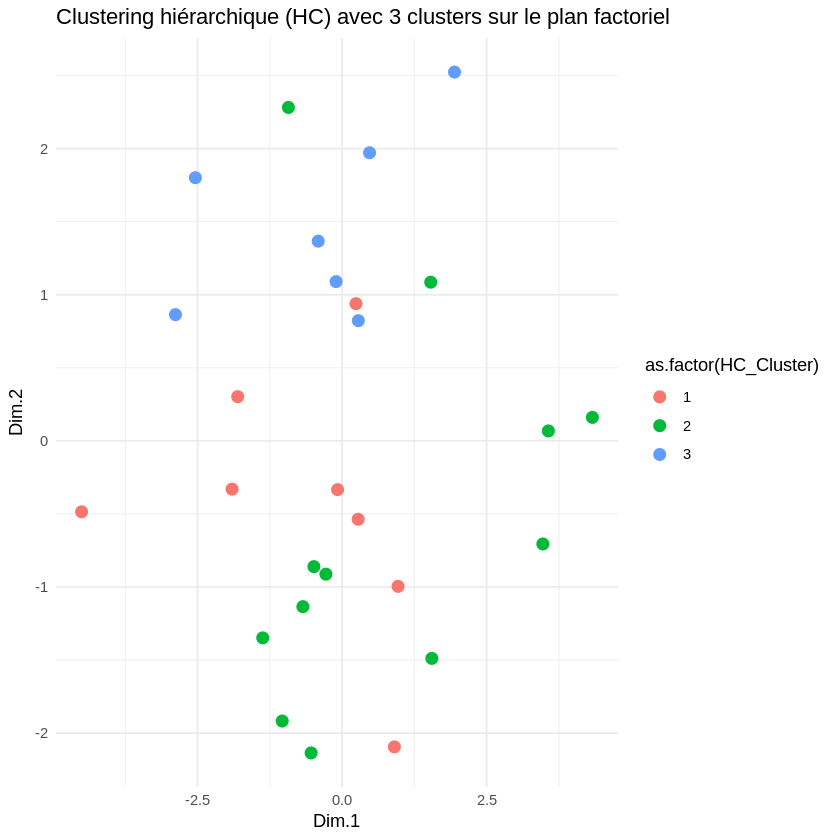

In [79]:
# Visualiser les clusters avec clustering hiérarchique sur le plan factoriel
ggplot(pca_data, aes(x = Dim.1, y = Dim.2, color = as.factor(HC_Cluster))) +
  geom_point(size = 3) +
  ggtitle("Clustering hiérarchique (HC) avec 3 clusters sur le plan factoriel") +
  theme_minimal()


Interprétation :

Clustering k-means : Les individus sont répartis dans 3 clusters (ou un autre nombre de clusters, en fonction de votre choix) en utilisant l'algorithme de k-means. Les points sont colorés selon leur cluster respectif.
Clustering hiérarchique (HC) : Le clustering hiérarchique est effectué avec la méthode de Ward, et les individus sont également répartis en 3 clusters, avec une couleur différente pour chaque cluster.

5

In [80]:
# Calculer la matrice de distances
dist_matrix <- dist(decathlon_data)

# Appliquer le clustering hiérarchique avec la méthode de Ward
hc <- hclust(dist_matrix, method = "ward.D2")


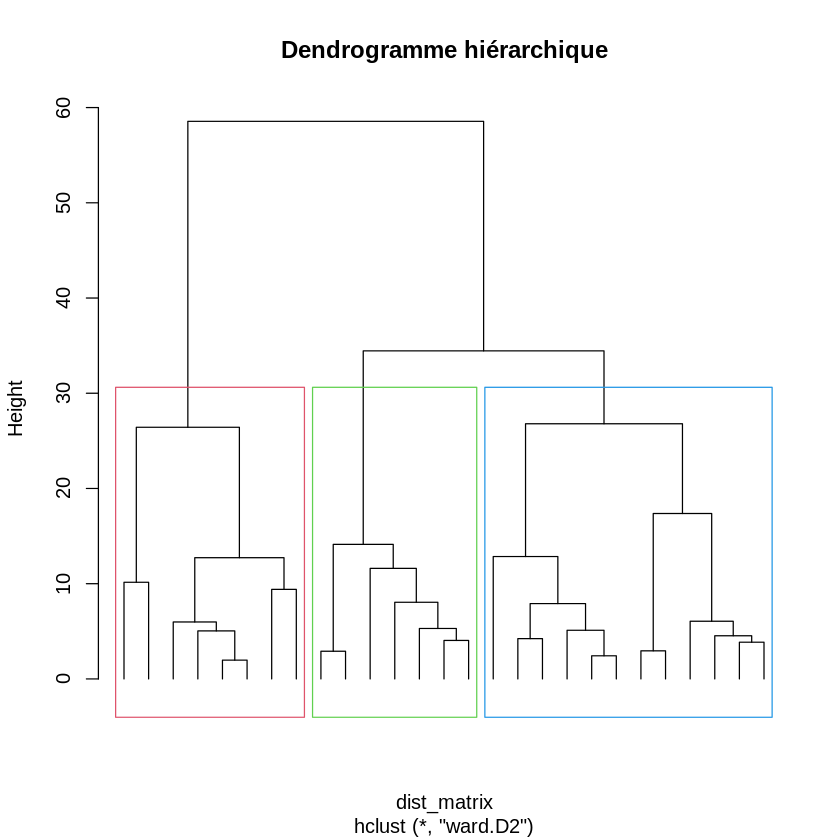

In [81]:
# Représenter le dendrogramme
plot(hc, labels = FALSE, hang = -1, main = "Dendrogramme hiérarchique")

# Découper l'arbre en 3 clusters
rect.hclust(hc, k = 3, border = 2:4)  # Ajouter des rectangles autour des clusters


le nombre de cluster a été choisi en regardant le dendrogramme, on peut identifier un point naturel où les branches se divisent, ici 3 clusters apparaissent comme un choix naturel, car au-delà, les fusions ne réduisent plus beaucoup la variance intra-cluster.

### 5 Autonomous project : dating app data

CA est utilisée lorsque vous avez deux variables qualitatives et que vous voulez analyser les associations entre leurs catégories.
MCA est utilisée lorsque vous avez plus de deux variables qualitatives et que vous voulez visualiser et interpréter les relations entre plusieurs catégories de variables qualitatives.

In [83]:
# Charger les bibliothèques nécessaires
library(dplyr)

# Créer un dataframe avec des variables qualitatives et quantitatives
set.seed(123) # Pour la reproductibilité

# Créer des données fictives
dating_data <- data.frame(
  Sexe = sample(c("Homme", "Femme"), 100, replace = TRUE),
  Statut_marital = sample(c("Célibataire", "En couple", "Divorcé"), 100, replace = TRUE),
  Préférence_loisirs = sample(c("Sport", "Musique", "Cinéma", "Lecture"), 100, replace = TRUE),
  Âge = sample(18:60, 100, replace = TRUE),
  Durée_inscription = sample(1:60, 100, replace = TRUE), # en mois
  Nb_messages_envoyés = sample(0:300, 100, replace = TRUE)
)

# Afficher un aperçu du dataframe
head(dating_data)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Sexe,Statut_marital,Préférence_loisirs,Âge,Durée_inscription,Nb_messages_envoyés
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Homme,Célibataire,Sport,35,30,240
2,Homme,En couple,Musique,59,51,23
3,Homme,Célibataire,Sport,48,22,166
4,Femme,En couple,Lecture,23,30,46
5,Homme,Célibataire,Cinéma,24,10,190
6,Femme,Divorcé,Sport,58,16,36


In [84]:
# Séparer les variables qualitatives
dating_data_qual <- select(dating_data, Sexe, Statut_marital, Préférence_loisirs)

# Séparer les variables quantitatives
dating_data_quant <- select(dating_data, Âge, Durée_inscription, Nb_messages_envoyés)

# Afficher un aperçu des deux dataframes
head(dating_data_qual)
head(dating_data_quant)


,Sexe,Statut_marital,Préférence_loisirs
,<chr>,<chr>,<chr>
1,Homme,Célibataire,Sport
2,Homme,En couple,Musique
3,Homme,Célibataire,Sport
4,Femme,En couple,Lecture
5,Homme,Célibataire,Cinéma
6,Femme,Divorcé,Sport


,Âge,Durée_inscription,Nb_messages_envoyés
,<int>,<int>,<int>
1,35,30,240
2,59,51,23
3,48,22,166
4,23,30,46
5,24,10,190
6,58,16,36


2

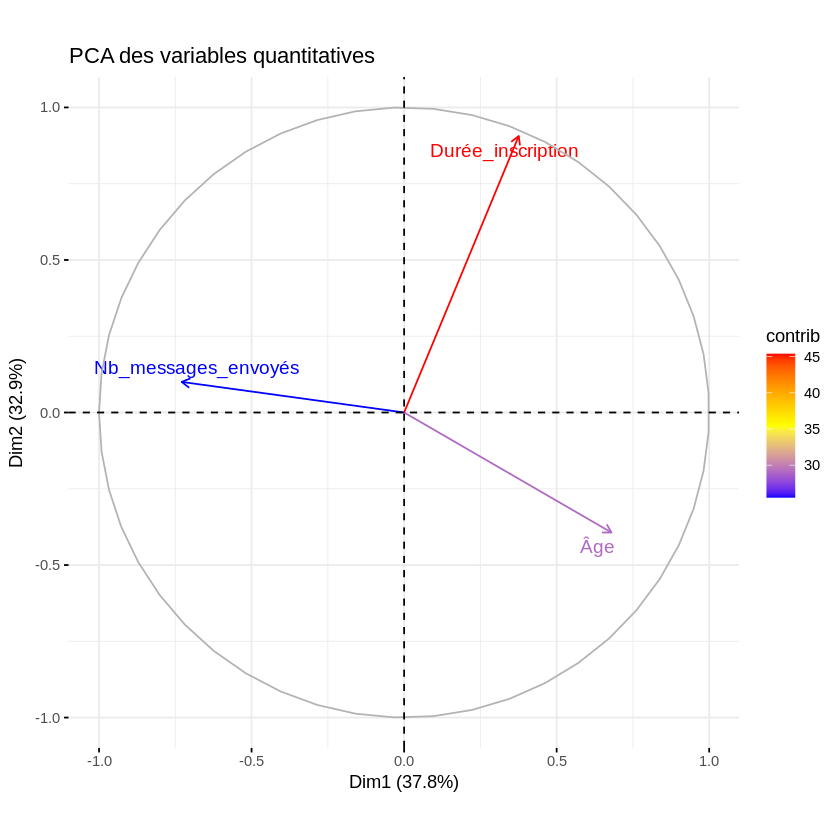

In [85]:
# Charger les bibliothèques nécessaires
library(FactoMineR)
library(factoextra)

# Réaliser la PCA sur les variables quantitatives
pca_quant <- PCA(dating_data_quant, scale.unit = TRUE, graph = FALSE)

# Représenter les variables quantitatives sans les individus
fviz_pca_var(pca_quant,
             col.var = "contrib", # Colorer selon la contribution
             gradient.cols = c("blue", "yellow", "red"), # Palette de couleurs
             repel = TRUE, # Éviter le chevauchement des labels
             title = "PCA des variables quantitatives")


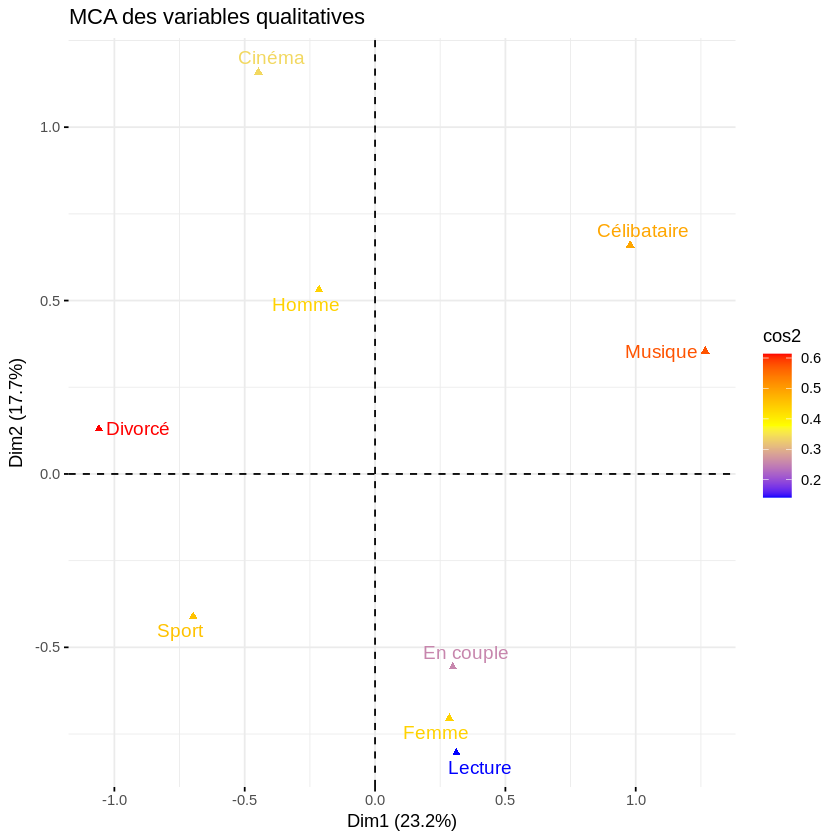

In [86]:
# Réaliser la MCA sur les variables qualitatives
mca_qual <- MCA(dating_data_qual, graph = FALSE)

# Représenter les variables qualitatives sans les individus
fviz_mca_var(mca_qual,
             col.var = "cos2", # Colorer selon la qualité de représentation (cos²)
             gradient.cols = c("blue", "yellow", "red"), # Palette de couleurs
             repel = TRUE, # Éviter le chevauchement des labels
             title = "MCA des variables qualitatives")


3

In [87]:
# Réaliser la MCA sur les variables qualitatives (si ce n'est pas encore fait)
mca_qual <- MCA(dating_data_qual, graph = FALSE)


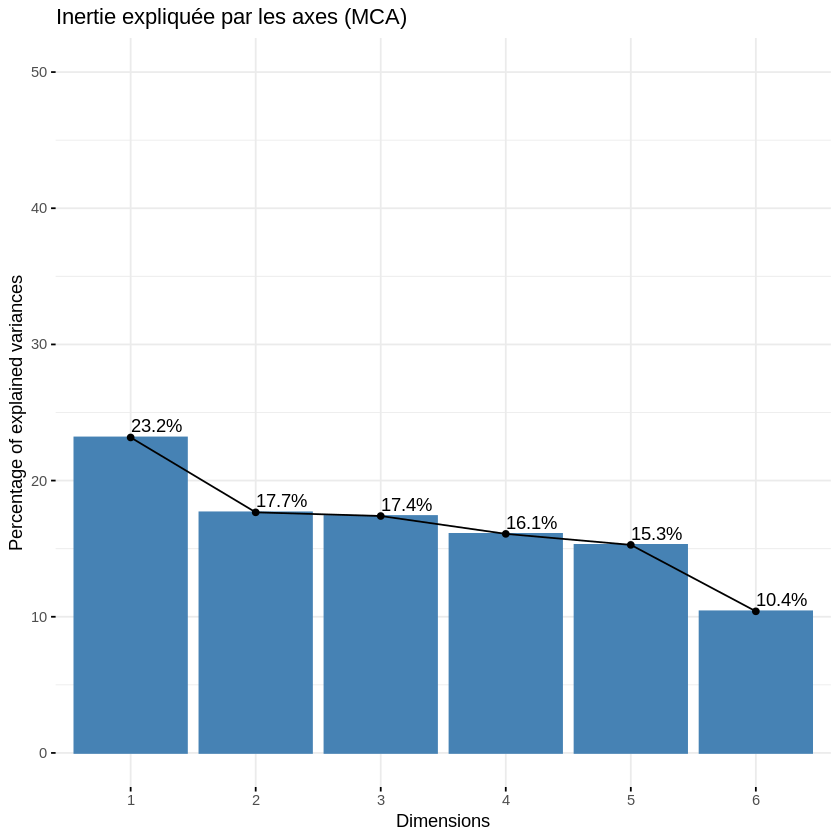

In [89]:
# Visualiser l'inertie expliquée par les axes
fviz_screeplot(mca_qual,
               addlabels = TRUE,
               ylim = c(0, 50),
               title = "Inertie expliquée par les axes (MCA)")


### two half moons

In [90]:
# Installer tous les packages nécessaires
install.packages("CCMMR")      # Package pour CCMMR
install.packages("dbscan")     # Package pour DBSCAN (clustering)
install.packages("factoextra") # Package pour K-means et visualisation
install.packages("cluster")    # Package pour clustering hiérarchique (HC)
install.packages("ggplot2")    # Package pour la visualisation
install.packages("mvtnorm")    # Package pour la génération de données multivariées

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RANN’, ‘r2r’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [91]:
# Charger les bibliothèques
library(CCMMR)
library(dbscan)
library(factoextra)  # Pour K-means et visualisation
library(cluster)     # Pour HC
library(ggplot2)     # Pour la visualisation
library(mvtnorm)


Thank you for using CCMMR!
To acknowledge our work, please cite the paper:

Touw, D.J.W., Groenen, P.J.F., and Terada, Y. (2022). Convex Clustering through MM: An Efficient Algorithm to Perform Hierarchical Clustering. arXiv preprint arXiv:2211.01877.



Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram




In [93]:
two_half_moons <- read.csv("data_moon_2.csv")
head(two_half_moons)

,V1,V2,V3
,<dbl>,<dbl>,<int>
1,0.87436152,0.2519989,0
2,-0.56736733,0.8117885,0
3,0.33026817,1.2011312,0
4,-0.07583576,1.0503856,0
5,1.33454730,-0.5489961,1
6,0.08828672,0.0615926,1


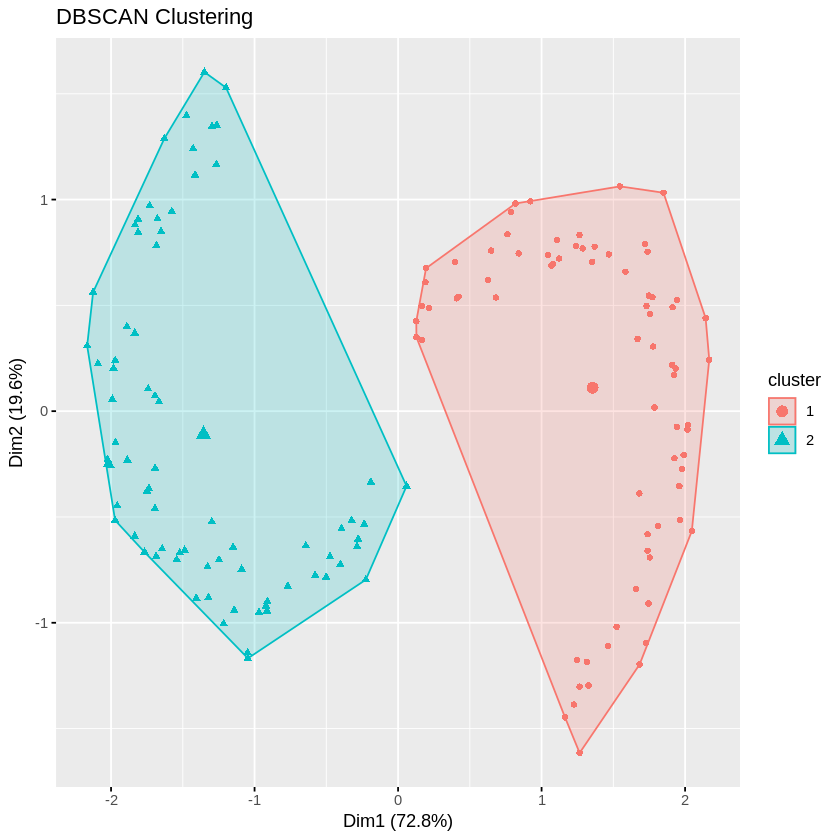

In [94]:
# Appliquer DBSCAN

two_half_moons <- read.csv("data_moon_2.csv")
set.seed(123)
dbscan_result <- dbscan(two_half_moons, eps = 0.3, minPts = 5)  # Ajuster les paramètres eps et minPts si nécessaire

# Visualiser les clusters DBSCAN
fviz_cluster(dbscan_result, two_half_moons, geom = "point",
             main = "DBSCAN Clustering")

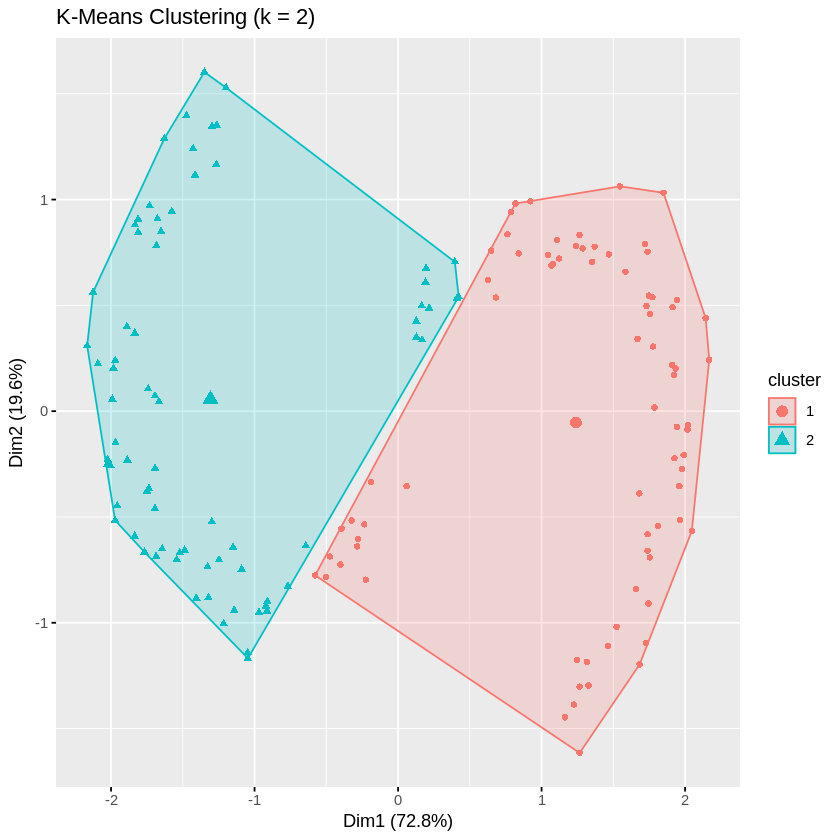

In [95]:
# Appliquer K-Means avec k = 2 (pour 2 clusters)
set.seed(123)
kmeans_result <- kmeans(two_half_moons, centers = 2, nstart = 25)

# Visualiser les clusters K-Means
fviz_cluster(kmeans_result, two_half_moons, geom = "point",
             main = "K-Means Clustering (k = 2)")

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


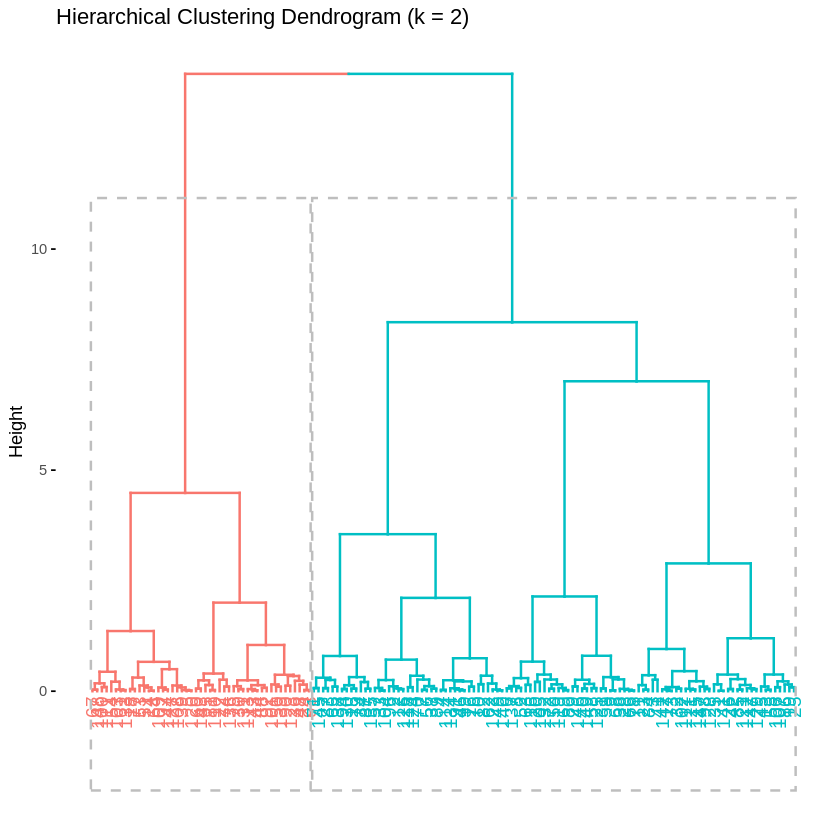

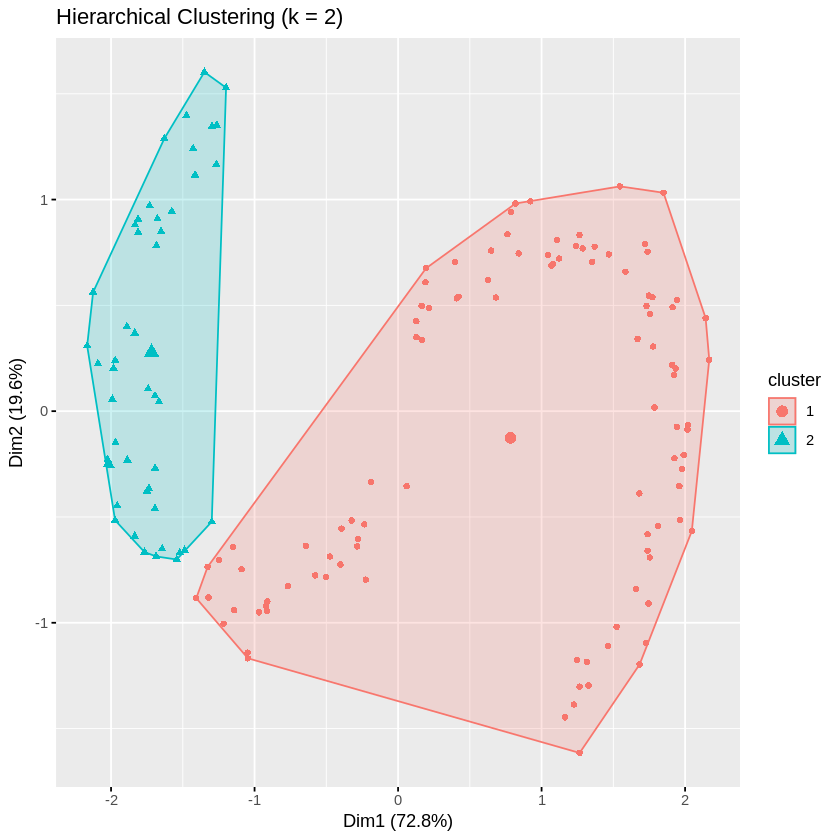

In [96]:
# Appliquer le clustering hiérarchique
dist_moons <- dist(two_half_moons)  # Calculer la matrice des distances
hc_result <- hclust(dist_moons, method = "ward.D2")

# Visualiser le dendrogramme
fviz_dend(hc_result, k = 2, rect = TRUE,
          main = "Hierarchical Clustering Dendrogram (k = 2)")

# Découper l'arbre pour obtenir 2 clusters
hc_clusters <- cutree(hc_result, k = 2)

# Visualiser les clusters HC sur le jeu de données
fviz_cluster(list(data = two_half_moons, cluster = hc_clusters),
             geom = "point", main = "Hierarchical Clustering (k = 2)")

In [98]:
# Fonction pour générer des blobs de points normalement distribués
data.gen.blobs <- function(n, centers = 3, std = 1) {
  num_points_per_cluster <- n %/% centers
  blobs <- NULL
  for (i in 1:centers) {
    center <- runif(2, -10, 10)
    blob <- rmvnorm(num_points_per_cluster, mean = center, sigma = diag(std, 2))
    blobs <- rbind(blobs, blob)
  }
  return(as.data.frame(blobs))
}

# Liste de tailles croissantes de datasets
sizes <- c(100, 500, 1000, 5000, 10000, 20000)

# Créer un dataframe pour stocker les résultats
results <- data.frame(Size = integer(), Algorithm = character(), Time = numeric(), stringsAsFactors = FALSE)

# Boucle sur chaque taille de dataset pour mesurer le temps de calcul
for (n in sizes) {
  # Générer le dataset en blobs
  blob_data <- data.gen.blobs(n = n, centers = 3)

  # Mesurer le temps de K-means
  time_kmeans <- system.time(kmeans(blob_data, centers = 3, nstart = 25))[3]
  results <- rbind(results, data.frame(Size = n, Algorithm = "K-Means", Time = time_kmeans))

  # Mesurer le temps de K-means++
  time_kmeanspp <- system.time(kmeans(blob_data, centers = 3, nstart = 25, algorithm = "Hartigan-Wong"))[3]
  results <- rbind(results, data.frame(Size = n, Algorithm = "K-Means++", Time = time_kmeanspp))

  # Mesurer le temps de Clustering Hiérarchique
  time_hc <- system.time(hclust(dist(blob_data), method = "ward.D2"))[3]
  results <- rbind(results, data.frame(Size = n, Algorithm = "Hierarchical Clustering", Time = time_hc))
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


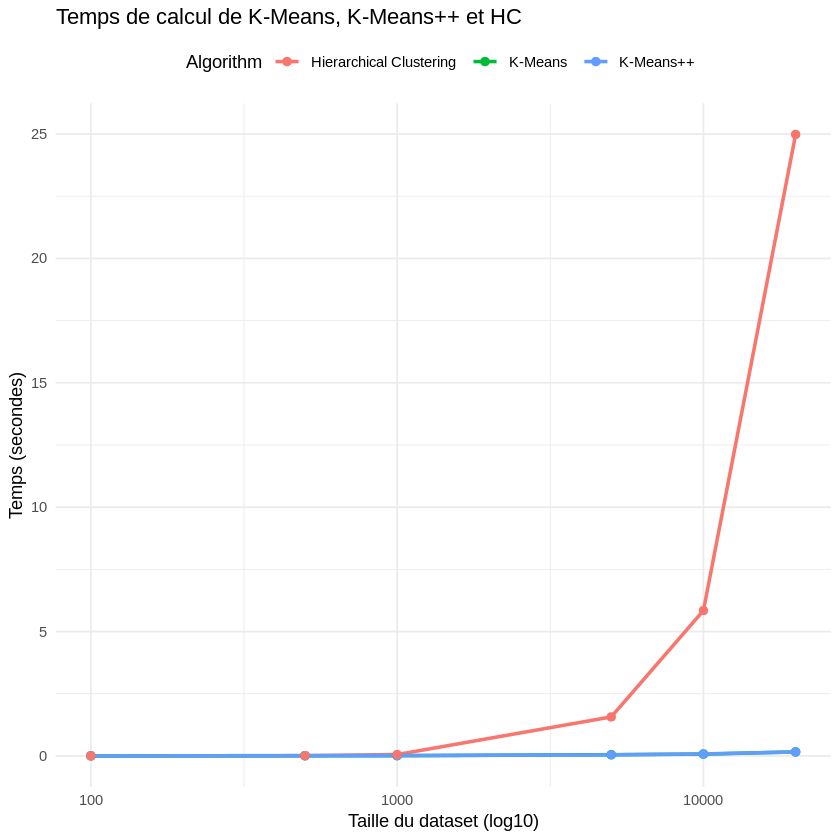

In [99]:
# Visualiser les résultats en un graphique
ggplot(results, aes(x = Size, y = Time, color = Algorithm)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_x_log10() +  # Utiliser une échelle logarithmique pour la taille du dataset
  labs(title = "Temps de calcul de K-Means, K-Means++ et HC", x = "Taille du dataset (log10)", y = "Temps (secondes)") +
  theme_minimal() +
  theme(legend.position = "top")

### Tinder

In [101]:
messages_tinder <- read.csv("messages.db.csv")
head(messages_tinder)

,conversationid,user1,user2,rank,inverse.rank,timestamp,mess.sentim,message.id,message.type,sender.id,reader.id,N.words
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1,1,2759,1,14,17320,3,1,aff.nor,1,2759,41
2,1,1,2759,2,13,17320,1,2,chunk,2759,1,43
3,1,1,2759,3,12,17320,-3,3,aff.nor,2759,1,26
4,1,1,2759,4,11,17320,-2,4,questn,2759,1,2
5,1,1,2759,5,10,17320,-1,5,aff.nor,1,2759,23
6,1,1,2759,6,9,17320,-3,6,questn,2759,1,18


In [102]:
install.packages("ngram")
library(ngram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
generate_ng <- function(col,n){
  sapply(col,function(x){
    # Check if the string is empty or contains only whitespace
    if (nchar(trimws(x)) == 0) {
      return(NA) # Return NA for empty strings
    } else {
      ng <- ngram(x, n = n)
      get.ngrams(ng)
    }
  })
}

In [106]:
messages_tinder$ngram <- generate_ng(messages_tinder$message.type,1)

head(messages_tinder)

,conversationid,user1,user2,rank,inverse.rank,timestamp,mess.sentim,message.id,message.type,sender.id,reader.id,N.words,ngram
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>
1,1,1,2759,1,14,17320,3,1,aff.nor,1,2759,41,aff.nor
2,1,1,2759,2,13,17320,1,2,chunk,2759,1,43,chunk
3,1,1,2759,3,12,17320,-3,3,aff.nor,2759,1,26,aff.nor
4,1,1,2759,4,11,17320,-2,4,questn,2759,1,2,questn
5,1,1,2759,5,10,17320,-1,5,aff.nor,1,2759,23,aff.nor
6,1,1,2759,6,9,17320,-3,6,questn,2759,1,18,questn


In [109]:
library(dplyr)
messages_tinder %>%
  group_by(conversationid)

conversationid,user1,user2,rank,inverse.rank,timestamp,mess.sentim,message.id,message.type,sender.id,reader.id,N.words,ngram
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>
1,1,2759,1,14,17320,3,1,aff.nor,1,2759,41,aff.nor
1,1,2759,2,13,17320,1,2,chunk,2759,1,43,chunk
1,1,2759,3,12,17320,-3,3,aff.nor,2759,1,26,aff.nor
1,1,2759,4,11,17320,-2,4,questn,2759,1,2,questn
1,1,2759,5,10,17320,-1,5,aff.nor,1,2759,23,aff.nor
1,1,2759,6,9,17320,-3,6,questn,2759,1,18,questn
1,1,2759,7,8,17320,-1,7,aff.nor,2759,1,37,aff.nor
1,1,2759,8,7,17320,4,8,aff.nor,1,2759,44,aff.nor
1,1,2759,9,6,17320,-3,9,aff.nor,1,2759,25,aff.nor


In [110]:
# Combiner les "message.type" groupés par "conversationid" en une seule chaîne de caractères séparée par un espace
result <- messages_tinder %>%
  group_by(conversationid) %>%
  summarise(message_concat = paste(message.type, collapse = " "))

# Afficher le résultat
result

conversationid,message_concat
<int>,<chr>
1,aff.nor chunk aff.nor questn aff.nor questn aff.nor aff.nor aff.nor chunk questn aff.nor aff.nor end
2,aff.nor aff.nor aff.nor aff.nor aff.nor aff.nor aff.nor chunk questn chunk aff.nor questn end
3,questn aff.nor questn aff.nor aff.nor aff.nor aff.nor aff.nor aff.nor aff.nor questn chunk aff.nor aff.nor chunk chunk questn aff.nor aff.nor chunk aff.nor questn phone
4,aff.nor aff.nor aff.nor questn questn aff.nor aff.nor aff.nor aff.nor questn aff.nor questn aff.nor aff.nor aff.nor aff.nor chunk aff.nor chunk chunk questn end
5,aff.nor aff.nor aff.off aff.off aff.off end
6,questn aff.nor aff.nor questn aff.nor chunk chunk aff.nor questn end
7,piss.off aff.nor questn questn piss.off aff.nor aff.off aff.off aff.off end
8,aff.nor aff.nor questn aff.nor questn questn chunk aff.nor aff.nor aff.nor questn aff.nor questn aff.nor questn questn questn questn end
9,aff.nor aff.nor aff.nor aff.nor aff.nor questn aff.nor end


In [111]:
ng <- ngram(result$message_concat,2)
get.ngrams(ng)

[1] "questn questn"     "aff.nor questn"    "aff.off piss.off" 
 [4] "aff.off aff.off"   "aff.off end"       "aff.nor piss.off" 
 [7] "piss.off questn"   "chunk aff.off"     "piss.off aff.off" 
[10] "piss.off end"      "piss.off chunk"    "questn end"       
[13] "chunk piss.off"    "aff.off phone"     "aff.nor aff.nor"  
[16] "piss.off phone"    "questn chunk"      "chunk chunk"      
[19] "aff.nor phone"     "aff.nor aff.off"   "piss.off aff.nor" 
[22] "questn aff.off"    "chunk phone"       "piss.off piss.off"
[25] "questn aff.nor"    "chunk aff.nor"     "aff.nor chunk"    
[28] "chunk end"         "questn piss.off"   "aff.nor end"      
[31] "questn phone"      "chunk questn"

In [112]:
ng <- ngram(result$message_concat,2)
ngrams_table <- get.phrasetable(ng)

ngrams_table <- ngrams_table %>%
  mutate(percentage = round(freq / sum(freq) * 100), 2)

ngrams_table

ngrams,freq,prop,percentage,2
<chr>,<int>,<dbl>,<dbl>,<dbl>
aff.nor aff.nor,13001,0.3539324313,35,2
aff.nor questn,4473,0.1217706150,12,2
questn aff.nor,4303,0.1171426238,12,2
aff.nor chunk,2539,0.0691204094,7,2
chunk aff.nor,2162,0.0588571584,6,2
questn questn,2125,0.0578498897,6,2
chunk chunk,1378,0.0375139520,4,2
chunk questn,1082,0.0294558027,3,2
questn chunk,871,0.0237116489,2,2


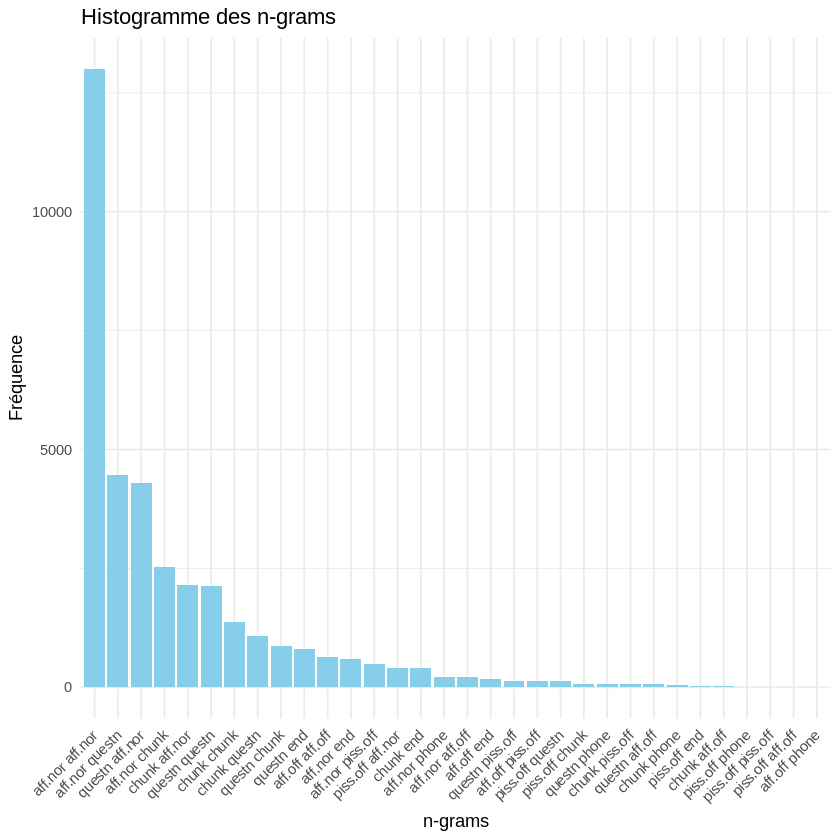

In [113]:
library(ggplot2)
ggplot(ngrams_table, aes(x = reorder(ngrams, -freq), y = freq)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Histogramme des n-grams",
       x = "n-grams",
       y = "Fréquence") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [117]:
library(dplyr)


# Fonction pour extraire les 6 derniers mots
extract_last_n_words <- function(text, n) {
  words <- unlist(strsplit(text, " "))  # Séparer le texte en mots
  last_words <- tail(words, n)  # Obtenir les n derniers mots
  paste(last_words, collapse = " ")  # Recréer une chaîne avec ces mots
} # Add closing curly brace to complete the function definition

# Ajouter une nouvelle colonne avec les 6 derniers mots
result <- result %>%
  mutate(last_6_words = sapply(message_concat, extract_last_n_words, n = 6))

# Afficher le résultat
print(result)

# A tibble: 2,582 × 3
   conversationid message_concat                                    last_6_words
            <int> <chr>                                             <chr>       
 1              1 aff.nor chunk aff.nor questn aff.nor questn aff.… aff.nor chu…
 2              2 aff.nor aff.nor aff.nor aff.nor aff.nor aff.nor … chunk quest…
 3              3 questn aff.nor questn aff.nor aff.nor aff.nor af… aff.nor aff…
 4              4 aff.nor aff.nor aff.nor questn questn aff.nor af… chunk aff.n…
 5              5 aff.nor aff.nor aff.off aff.off aff.off end       aff.nor aff…
 6              6 questn aff.nor aff.nor questn aff.nor chunk chun… aff.nor chu…
 7              7 piss.off aff.nor questn questn piss.off aff.nor … piss.off af…
 8              8 aff.nor aff.nor questn aff.nor questn questn chu… aff.nor que…
 9              9 aff.nor aff.nor aff.nor aff.nor aff.nor questn a… aff.nor aff…
10             10 questn aff.nor aff.nor aff.nor aff.nor chunk aff… chunk quest…
# ℹ 2,

In [118]:
# Filtrer les lignes où il y a au moins 6 mots
result_filtered <- result %>%
  filter(sapply(strsplit(last_6_words, " "), length) >= 6)

# Appliquer ngram sur les données filtrées
ng2 <- ngram(result_filtered$last_6_words, n = 6)

# Obtenir le tableau des n-grams
ngrams_table2 <- get.phrasetable(ng2)

# Calculer le pourcentage
ngrams_table2 <- ngrams_table2 %>%
  mutate(percentage = round(freq / sum(freq) * 100, 2))

# Afficher le tableau des n-grams avec les pourcentages
ngrams_table2

ngrams,freq,prop,percentage
<chr>,<int>,<dbl>,<dbl>
aff.nor aff.nor questn questn questn end,131,0.053230394,5.32
aff.nor aff.nor chunk chunk questn end,124,0.050386022,5.04
aff.nor aff.nor chunk chunk chunk end,120,0.048760666,4.88
aff.nor aff.nor aff.nor aff.nor aff.nor end,117,0.047541650,4.75
aff.nor aff.nor aff.off aff.off aff.off end,76,0.030881755,3.09
aff.nor aff.nor aff.off aff.off aff.off piss.off,61,0.024786672,2.48
questn aff.nor chunk chunk questn end,51,0.020723283,2.07
questn aff.nor chunk chunk chunk end,43,0.017472572,1.75
questn aff.nor questn questn questn end,39,0.015847217,1.58


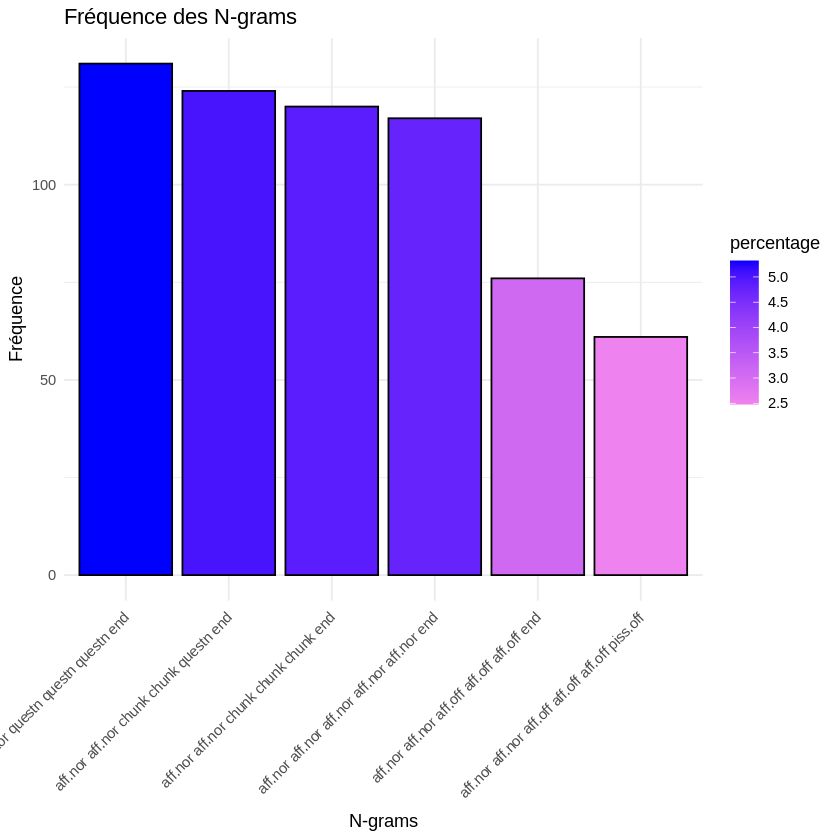

In [121]:
# Créer un bar plot basé sur les fréquences des n-grams
ggplot(head(ngrams_table2), aes(x = reorder(ngrams, -freq), y = freq, fill = percentage)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_gradient(low = "violet", high = "blue") +
  theme_minimal() +
  labs(title = "Fréquence des N-grams", x = "N-grams", y = "Fréquence") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [123]:
# Installer les packages nécessaires
install.packages("TraMineR")   # Package pour l'analyse de séquences
install.packages("ggplot2")    # Package pour la visualisation
install.packages("ggseqplot")  # Package pour la visualisation de séquences
install.packages("dplyr")      # Package pour la manipulation de données
install.packages("tidyr")      # Package pour la manipulation de données (reshaping)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘vegan’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’, ‘rbibutils’, ‘ggh4x’, ‘ggtext’, ‘patchwork’, ‘Rdpack’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [124]:
# Charger les bibliothèques nécessaires
library(TraMineR)
library(ggplot2)
library(ggseqplot)
library(dplyr)
library(tidyr)

Registered S3 method overwritten by 'vegan':
  method     from      
  rev.hclust dendextend


TraMineR stable version 2.2-10 (Built: 2024-10-03)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.




ngrams
<chr>
aff.nor aff.nor questn questn questn end
aff.nor aff.nor chunk chunk questn end
aff.nor aff.nor chunk chunk chunk end
aff.nor aff.nor aff.nor aff.nor aff.nor end
aff.nor aff.nor aff.off aff.off aff.off end
aff.nor aff.nor aff.off aff.off aff.off piss.off
questn aff.nor chunk chunk questn end
questn aff.nor chunk chunk chunk end
questn aff.nor questn questn questn end


Warning message:
“Expected 6 pieces. Additional pieces discarded in 442 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
 [>] 7 distinct states appear in the data: 

     1 = aff.nor

     2 = aff.off

     3 = chunk

     4 = end

     5 = phone

     6 = piss.off

     7 = questn

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  aff.nor     aff.nor  aff.nor

     2  aff.off     aff.off  aff.off

     3  chunk       chunk    chunk

     4  end         end      end

     5  phone       phone    phone

     6  piss.off    piss.off piss.off

     7  questn      questn   questn

 [>] 442 sequences in the data set

 [>] min/max sequence length: 6/6

 [>] computing transition probabilities for states aff.nor/aff.off/chunk/end/phone/piss.off/questn ...



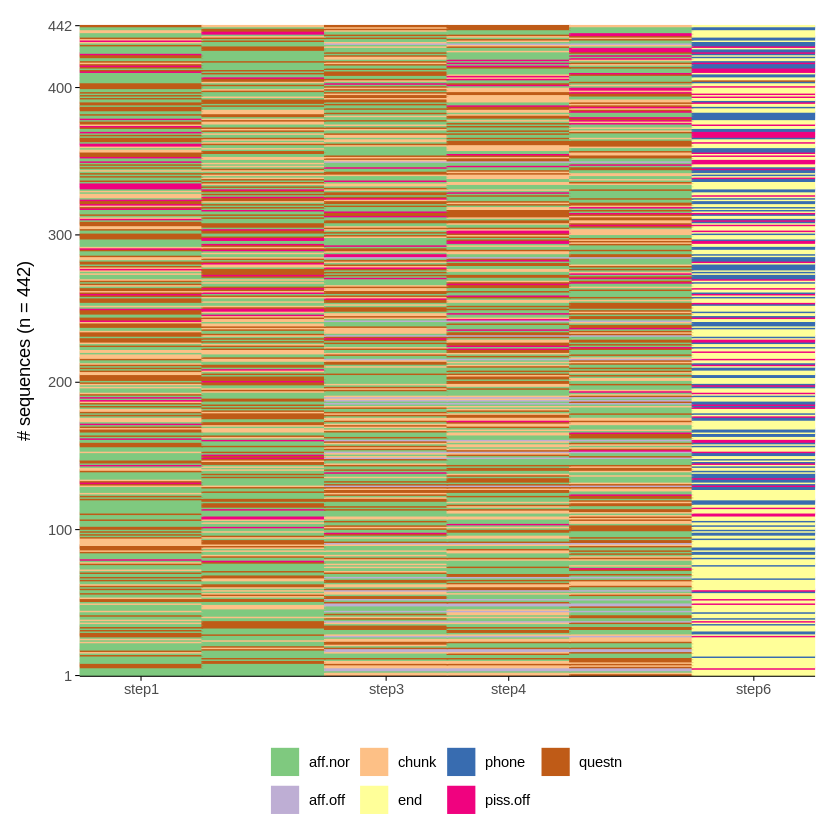

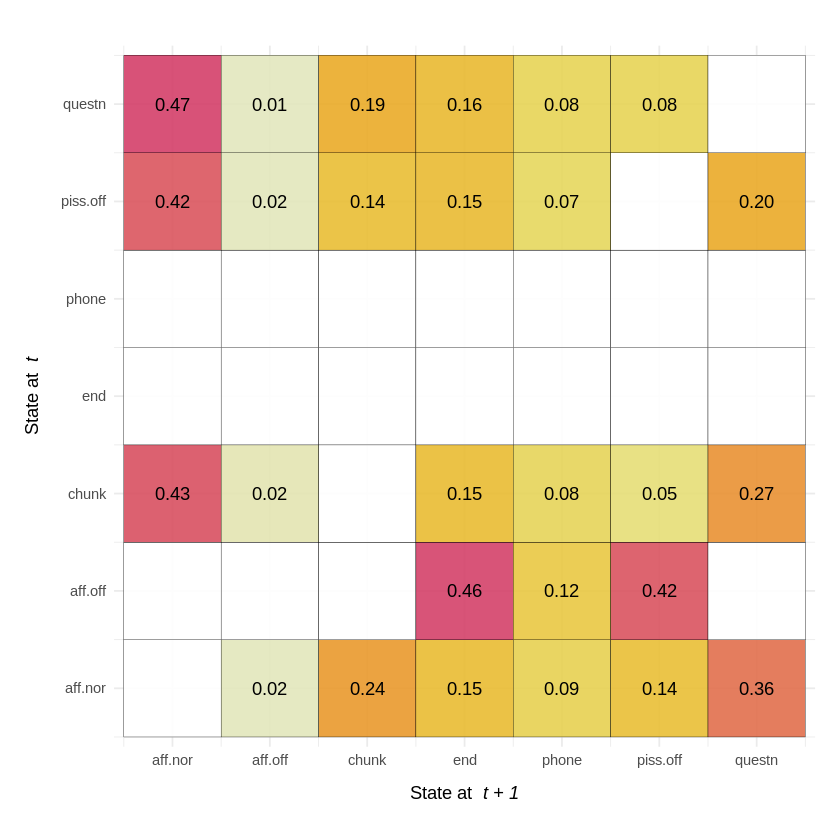

In [125]:
# Charger et préparer les données
# On suppose que ngrams_table2 est un data frame avec une colonne "ngrams"
seq_data <- ngrams_table2 %>%
  select(ngrams)

seq_data

# Séparer les séquences en différentes colonnes, remplir les colonnes manquantes avec "NA"
seq_data_matrix <- seq_data %>%
  separate(ngrams, into = c("step1", "step2", "step3", "step4", "step5", "step6"), sep = " ", fill = "right") %>%
  replace(is.na(.), "NA") %>%
  as.matrix()

seq_data_TMR <- seqdef(seq_data_matrix)

ggseqiplot(seq_data_TMR, sortv = TRUE)
ggseqtrplot(seq_data_TMR)

In [129]:
install.packages('tm')
install.packages('stringdist') # Install the missing package
library(tm)
library(cluster)
library(stringdist)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘stringdist’


The following object is masked from ‘package:tidyr’:

    extract




In [131]:
# Ensure ngrams is a character vector containing the sequences
ngrams <- as.character(ngrams_table2$ngrams)

# Calcul de la distance de Jaccard
dist_matrix <- stringdistmatrix(ngrams, method = "jaccard")

# Application de la méthode AGNES
agnes_model <- agnes(dist_matrix, diss = TRUE, method = "average")

# Découpage de l'arbre en 4 clusters
clusters <- cutree(as.hclust(agnes_model), k = 4)

# Affichage des résultats
print(clusters)

  [1] 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 3
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 3 1 1 1 1 1 1 1 2
 [75] 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 4 1 3 1 1 3 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
[112] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1
[149] 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[408] 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 3



---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




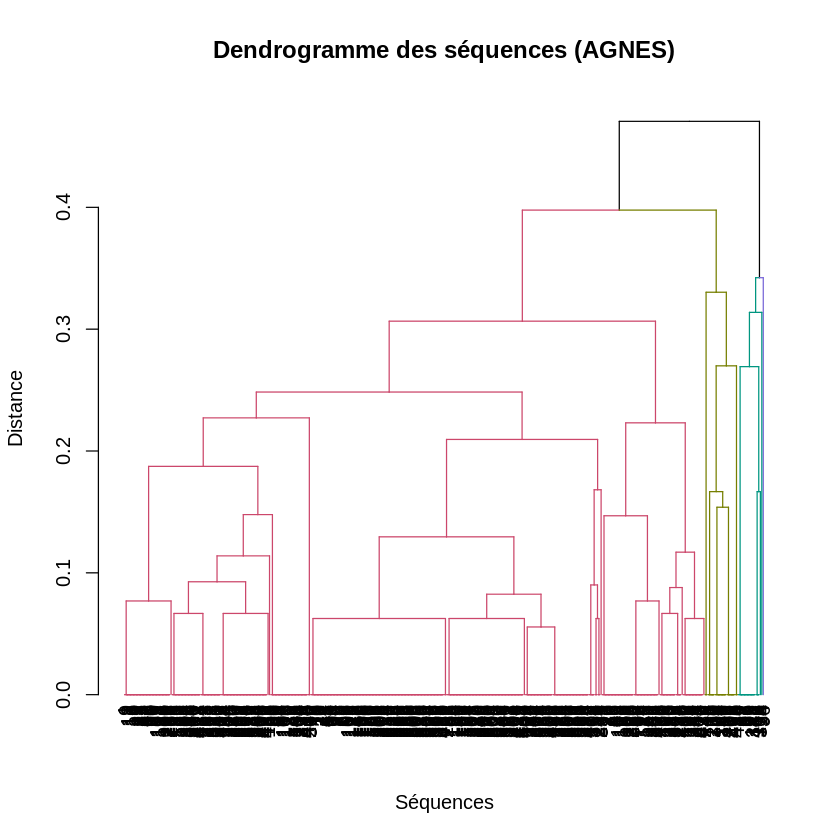

In [132]:
library("dendextend")
# Convertir l'AGNES en un objet dendrogramme pour la visualisation
dend <- as.dendrogram(as.hclust(agnes_model))

# Colorier les branches du dendrogramme selon les clusters
dend <- color_branches(dend, k = 4)

# Affichage du dendrogramme
plot(dend, main = "Dendrogramme des séquences (AGNES)", ylab = "Distance", xlab = "Séquences")

In [133]:
library(stringdist)
library(cluster)
library(ggplot2)
library(dplyr)

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 2)”


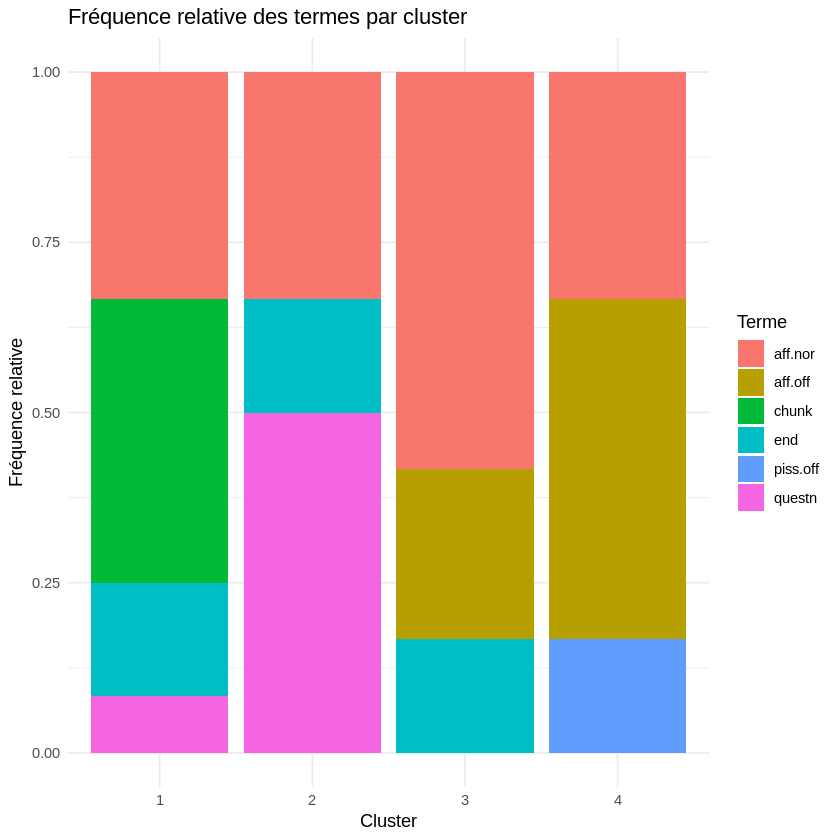

In [134]:
# Exemple de données (tu utiliseras tes propres données)
ngrams <- c("aff.nor aff.nor chunk chunk questn end",
            "aff.nor aff.nor questn questn questn end",
            "aff.nor aff.nor chunk chunk chunk end",
            "aff.nor aff.nor aff.nor aff.nor aff.nor end",
            "aff.nor aff.nor aff.off aff.off aff.off end",
            "aff.nor aff.nor aff.off aff.off aff.off piss.off")

# Calcul de la distance de Jaccard
dist_matrix <- stringdistmatrix(ngrams, method = "jaccard")

# Application de la méthode AGNES
agnes_model <- agnes(dist_matrix, diss = TRUE, method = "average")

# Découpage de l'arbre en 4 clusters
clusters <- cutree(as.hclust(agnes_model), k = 4)

# Ajouter les clusters aux données originales
cluster_data <- data.frame(ngrams = ngrams, cluster = clusters)

# Extraire les éléments uniques dans chaque séquence
get_terms <- function(ngram) {
  unlist(strsplit(ngram, " "))
}

# Transformer les séquences en un data frame avec la fréquence des termes par cluster
term_frequencies <- do.call(rbind, lapply(1:nrow(cluster_data), function(i) {
  terms <- get_terms(cluster_data$ngrams[i])
  table(terms)
}))

# Additionner les fréquences par cluster
all_terms <- unique(unlist(lapply(ngrams, get_terms)))  # Obtenir tous les termes uniques
cluster_terms <- lapply(unique(cluster_data$cluster), function(c) {
  terms_in_cluster <- cluster_data[cluster_data$cluster == c, "ngrams"]
  terms_list <- unlist(lapply(terms_in_cluster, get_terms))
  freq_table <- table(terms_list)

  # Créer un tableau avec tous les termes et des fréquences zéro pour les termes absents
  freq_vector <- sapply(all_terms, function(term) ifelse(term %in% names(freq_table), freq_table[term], 0))
  return(freq_vector)
})

# Convertir en un data frame pour ggplot
df <- data.frame(
  cluster = rep(1:4, each = length(all_terms)),
  term = rep(all_terms, 4),
  freq = unlist(cluster_terms),
  stringsAsFactors = FALSE
)

# Normaliser les fréquences pour obtenir des fréquences relatives
df <- df %>%
  group_by(cluster) %>%
  mutate(rel_freq = freq / sum(freq))

# Créer un graphique avec ggplot2
ggplot(df, aes(x = factor(cluster), y = rel_freq, fill = term)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Fréquence relative des termes par cluster",
       x = "Cluster",
       y = "Fréquence relative",
       fill = "Terme") +
  theme_minimal()